<a href="https://colab.research.google.com/github/samyak-anand/Master_Thesis_Enhancing_Stock_Price_Prediction_FinBERT/blob/LSTM/ST_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Defining and Importing necessary libraries

In [96]:
# Install essential libraries for ML and data processing
!pip install scikit-learn imbalanced-learn xgboost nltk matplotlib seaborn wordcloud mplfinance tqdm transformers mplfinance

In [97]:
# =========================
# Essential Libraries for Data Handling and Preprocessing
# =========================
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical computations
import os  # Operating system interfaces
import warnings  # Handle warning messages


# =========================
# Text Cleaning and NLP Libraries
# =========================
import re  # Regular expressions for text pattern matching
import string  # String operations
import nltk  # Natural Language Toolkit for NLP
from nltk.corpus import stopwords  # Stopword removal
from nltk.tokenize import word_tokenize  # Tokenization
from nltk.stem import WordNetLemmatizer  # Lemmatization

# =========================
# Data Visualization Libraries
# =========================
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization
from wordcloud import WordCloud  # Generate word clouds
import mplfinance as mpf  # Financial data visualization (candlestick charts)

# =========================
# Machine Learning Libraries
# =========================
from sklearn.preprocessing import LabelEncoder  # Encode categorical labels
from sklearn.feature_extraction.text import CountVectorizer  # Bag of Words representation
from sklearn.decomposition import PCA  # Dimensionality Reduction
from sklearn.model_selection import train_test_split, GridSearchCV  # Model training and hyperparameter tuning
from sklearn.linear_model import LogisticRegression  # Logistic Regression Model
from sklearn.ensemble import RandomForestClassifier  # Random Forest Model
from sklearn.svm import SVC  # Support Vector Machine Classifier
from xgboost import XGBClassifier  # XGBoost Classifier
from imblearn.over_sampling import SMOTE  # Handling class imbalance with SMOTE

# =========================
# Model Evaluation Metrics
# =========================
from sklearn.metrics import (
    accuracy_score,  # Accuracy score
    confusion_matrix,  # Confusion matrix
    classification_report,  # Precision, recall, F1-score
    roc_curve,  # ROC curve
    auc  # Area Under the Curve (AUC) score
)

# =========================
# Transformers for Sentiment Analysis
# =========================
from transformers import pipeline  # Sentiment analysis pipeline from Hugging Face

# =========================
# Progress Tracking
# =========================
from tqdm import tqdm  # Progress bar for loops

# =========================
# Miscellaneous Libraries
# =========================
import mplfinance as mpf  # For financial visualizations (stock price candlestick charts)


warnings.filterwarnings('ignore')  # Ignore warnings for cleaner output

In [98]:
import os
print("Current Working Directory:", os.getcwd())


Current Working Directory: /content


In [99]:
# =========================
# Function to Save and Show Plots Automatically
# =========================
import datetime


def save_and_show_plot(filename, folder="saved_plots", file_format="png", dpi=300, prevent_override=True, show=True):
    """
    Saves and optionally displays the current matplotlib plot.

    Parameters:
    - filename (str): Name of the file without extension.
    - folder (str): Folder where the plot will be saved. Defaults to 'saved_plots'.
    - file_format (str): Format to save the plot (e.g., 'png', 'jpg', 'pdf'). Defaults to 'png'.
    - dpi (int): Resolution of the saved plot. Defaults to 300.
    - prevent_override (bool): Prevents overwriting existing plots by adding a timestamp.
    - show (bool): If True, displays the plot after saving.
    """

    # Create the directory if it doesn't exist
    if not os.path.exists(folder):
        os.makedirs(folder)

    # Add timestamp if preventing override
    if prevent_override:
        timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
        filename = f"{filename}_{timestamp}"

    # Construct the full file path
    full_path = os.path.join(folder, f"{filename}.{file_format}")

    # Save and optionally display the plot
    fig = plt.gcf()
    fig.savefig(full_path, format=file_format, dpi=dpi, bbox_inches='tight')

    if show:
        plt.show()  # Display the plot in the output

    plt.close(fig)  # Close the plot to avoid overlap

    print(f"Plot successfully saved at {full_path}")

### Load the dataset

In [100]:
# =========================
# Load Dataset Function Documentation
# =========================
'''
    /*-------------------- LOAD_dataset ----------------
    | Function  : read_csv()
    | Purpose   : Read a Dataset in CSV file Format
    | Arguments :
    |       path    : Path to dataset file
    |       dataset : Dataset file name
    | Return    :
    |       dataset : Dataset in DataFrame Format
    *---------------------------------------------------------*/
'''

# =========================
# Loading Datasets from CSV Files
# =========================

# Load tweet dataset from CSV file into a DataFrame
tweet_data = pd.read_csv('stock_tweets.csv')
tweet_data = pd.DataFrame(tweet_data)  # Ensures the loaded data is in DataFrame format

# Load stock dataset from CSV file into a DataFrame
stock_data = pd.read_csv('historical_stock_data.csv')
stock_data = pd.DataFrame(stock_data)  # Ensures the loaded data is in DataFrame format

# =========================
# Verifying Loaded Data
# =========================

# Display the shape of both datasets (number of rows and columns)
print("Tweet Data Shape:", tweet_data.shape)  # Shows dimensions of tweet data
print("Stock Data Shape:", stock_data.shape)  # Shows dimensions of stock data

# Display the first 5 rows of tweet data for verification
print("\nFirst 5 rows of Tweet Data:")
display(tweet_data.head())

# Display the first 5 rows of stock data for verification
print("\nFirst 5 rows of Stock Data:")
display(stock_data.head())


Tweet Data Shape: (80793, 4)
Stock Data Shape: (6300, 8)

First 5 rows of Tweet Data:


,Date,Tweet,Ticker,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."



First 5 rows of Stock Data:


,Date,open,high,low,close,Adj Close,Volume,ticker
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


In [101]:
# =========================
# Convert 'Date' Columns to Datetime Format
# =========================

# Convert the 'Date' column in the stock dataset to datetime format
# 'errors="coerce"' will handle invalid parsing by converting them to NaT (Not a Time)
stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce').dt.date

# Convert the 'Date' column in the tweet dataset to datetime format
tweet_data['Date'] = pd.to_datetime(tweet_data['Date'], errors='coerce').dt.date

# =========================
# Confirm Date Conversion
# =========================

# Print the first 5 rows of the converted 'Date' column in stock_data
print("First 5 dates from stock_data:")
print(stock_data['Date'].head())

# Print the first 5 rows of the converted 'Date' column in tweet_data
print("\nFirst 5 dates from tweet_data:")
print(tweet_data['Date'].head())


First 5 dates from stock_data:
0    2021-09-30
1    2021-10-01
2    2021-10-04
3    2021-10-05
4    2021-10-06
Name: Date, dtype: object

First 5 dates from tweet_data:
0    2022-09-29
1    2022-09-29
2    2022-09-29
3    2022-09-29
4    2022-09-29
Name: Date, dtype: object


In [102]:
def trim(df):
    """
    Cleans the DataFrame by performing the following operations:
    - Strips whitespace from column names
    - Drops duplicate rows
    - Converts column names to lowercase
    - Replaces spaces in column names with underscores
    - Converts object columns to string type and strips whitespace
    """

    # Strip leading and trailing whitespace from column names
    df.columns = df.columns.str.strip()

    # Drop duplicate rows to ensure unique entries
    df = df.drop_duplicates()

    # Convert all column names to lowercase for consistency
    df.columns = df.columns.str.lower()

    # Replace spaces in column names with underscores for easier access
    df.columns = df.columns.str.replace(' ', '_')

    # Select columns with object data types (categorical/textual data)
    df_obj = df.select_dtypes(['object'])

    # Convert object type columns to string and strip whitespace from each value
    df[df_obj.columns] = df_obj.apply(lambda x: x.astype(str).str.strip())

    # Print confirmation message after cleaning
    print("All column names cleaned, duplicates dropped, and text columns processed.")

    # Return the cleaned DataFrame
    return df


In [103]:
# =========================
# Applying the Cleaning Function to Both Datasets
# =========================

# Apply the trim function to the tweet dataset
print("Cleaning Tweet Data...")
tweet_data_cleaned = trim(tweet_data)  # Cleans tweet dataset (removes duplicates, standardizes column names, strips whitespace)

# Apply the trim function to the stock dataset
print("Cleaning Stock Data...")
stock_data_cleaned = trim(stock_data)  # Cleans stock dataset (removes duplicates, standardizes column names, strips whitespace)

# =========================
# Verification of Cleaned Data
# =========================

# Display the shape of cleaned tweet dataset
print("Shape of Cleaned Tweet Data:", tweet_data_cleaned.shape)

# Display the shape of cleaned stock dataset
print("Shape of Cleaned Stock Data:", stock_data_cleaned.shape)

# Preview the first 5 rows of the cleaned tweet dataset
print("\nFirst 5 rows of Cleaned Tweet Data:")
display(tweet_data_cleaned.head())

# Preview the first 5 rows of the cleaned stock dataset
print("\nFirst 5 rows of Cleaned Stock Data:")
display(stock_data_cleaned.head())


Cleaning Tweet Data...
All column names cleaned, duplicates dropped, and text columns processed.
Cleaning Stock Data...
All column names cleaned, duplicates dropped, and text columns processed.
Shape of Cleaned Tweet Data: (80769, 4)
Shape of Cleaned Stock Data: (6300, 8)

First 5 rows of Cleaned Tweet Data:


,date,tweet,ticker,company_name
0,2022-09-29,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."



First 5 rows of Cleaned Stock Data:


,date,open,high,low,close,adj_close,volume,ticker
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


Tweet Text Cleaning Steps:
Convert text to lowercase.
Remove URLs.
Remove mentions (@usernames).
Remove hashtags (but keep the words).
Remove numbers and special characters.
Remove extra whitespaces.
Remove stopwords.
Lemmatization.

In [104]:
# =========================
# Pre-processing Data Function Documentation
# =========================
'''
    /*------------------------ PRE-PROCESSING DATA -------------
    | Function  : lower() & re.sub()
    | Purpose   : Perform the following preprocessing:
    |              • Convert text to lowercase
    |              • Remove punctuation marks
    |              • Remove URLs, mentions, hashtags, digits
    |              • Remove stopwords
    |              • Strip extra whitespace
    | Arguments :
    |       text : Input text to be pre-processed
    | Return    :
    |       text : Cleaned and pre-processed text
    *----------------------------------------------------------*/
'''

# Download required NLTK resources (Stopwords)
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# =========================
# Define the Data Preprocessing Function
# =========================

def data_preprocessing(text):
    """
    Preprocesses the input text by:
    - Removing URLs, mentions, hashtags, digits, punctuation, and stopwords
    - Converting text to lowercase
    - Removing extra whitespace and single characters
    """

    # Ensure that the input is a string
    if not isinstance(text, str):
        return ""  # Return empty string if input is not a valid string

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove mentions (words starting with @)
    text = re.sub(r'@\w+', '', text)

    # Remove hashtags (remove the # symbol and the following word)
    text = re.sub(r'#\w+', '', text)

    # Remove numeric digits
    text = re.sub(r'\d+', '', text)

    # Remove punctuation marks
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]+', ' ', text)

    # Replace multiple whitespaces with a single space
    text = re.sub(r'\s+', ' ', text)

    # Convert text to lowercase
    text = text.lower()

    # Remove single characters
    text = re.sub(r'\b\w\b', '', text)

    # Remove extra whitespace after removing single characters
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove words with fewer than 3 characters
    text = ' '.join(word for word in text.split() if len(word) >= 3)

    # Remove stopwords
    stop_words = stopwords.words('english')
    text = ' '.join(word for word in text.split() if word.lower() not in stop_words)

    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [105]:
# =========================
# Applying Preprocessing to Tweet Data
# =========================

# Apply the data_preprocessing function to the 'tweet' column
# Cleans all text data by removing unnecessary characters and formatting
tweet_data_cleaned['tweet'] = tweet_data_cleaned['tweet'].apply(data_preprocessing)

# =========================
# Renaming 'stock_name' Column to 'ticker' (if applicable)
# =========================

# Check if the column 'stock_name' exists before renaming
if 'stock_name' in tweet_data_cleaned.columns:
    tweet_data_cleaned.rename(columns={'stock_name': 'ticker'}, inplace=True)  # Rename for consistency
    print("Column 'stock_name' has been renamed to 'ticker'.")
else:
    print("Column 'stock_name' not found in DataFrame. Skipping renaming.")

# =========================
# Verifying Data After Pre-processing
# =========================

# Display a message and preview of the cleaned DataFrame
print("\nData After Pre-processing:")
print("====================================\n")
display(tweet_data_cleaned.head())  # Display the first 5 rows of the preprocessed dataset


Column 'stock_name' not found in DataFrame. Skipping renaming.

Data After Pre-processing:



,date,tweet,ticker,company_name
0,2022-09-29,mainstream media done amazing job brainwashing...,TSLA,"Tesla, Inc."
1,2022-09-29,tesla delivery estimates around analysts tsla,TSLA,"Tesla, Inc."
2,2022-09-29,even include unvested rsus additional equity n...,TSLA,"Tesla, Inc."
3,2022-09-29,hahaha still trying stop tesla fsd bro get shi...,TSLA,"Tesla, Inc."
4,2022-09-29,stop trying kill kids sad deranged old man,TSLA,"Tesla, Inc."


In [106]:
# =========================
# Renaming 'Ticker' Column to 'ticker' for Consistency
# =========================

# Check if the column 'Ticker' exists before renaming
if 'Ticker' in tweet_data_cleaned.columns:
    tweet_data_cleaned.rename(columns={'Ticker': 'ticker'}, inplace=True)  # Rename for uniformity
    print("Column 'Ticker' has been successfully renamed to 'ticker'.")
else:
    print("Column 'Ticker' not found in DataFrame. Skipping renaming.")

# =========================
# Verifying Column Renaming
# =========================

# Print all column names to confirm the renaming
print("\nRenamed columns in tweet_data_cleaned:")
print(tweet_data_cleaned.columns)


Column 'Ticker' not found in DataFrame. Skipping renaming.

Renamed columns in tweet_data_cleaned:
Index(['date', 'tweet', 'ticker', 'company_name'], dtype='object')


In [107]:
# =========================
# Merging Tweet and Stock Datasets on 'date' and 'ticker'
# =========================

# Perform a left join to combine tweet data with corresponding stock data
# This ensures all records from tweet_data_cleaned are retained
merged_data = pd.merge(
    tweet_data_cleaned,  # Left DataFrame (tweets)
    stock_data_cleaned,  # Right DataFrame (stock data)
    on=['date', 'ticker'],  # Merge based on matching 'date' and 'ticker' values
    how='left'  # Retain all records from tweet_data_cleaned
)

# =========================
# Verifying the Merged Dataset
# =========================

# Display the shape of the merged DataFrame (rows, columns)
print("Shape of the merged dataset:", merged_data.shape)

# Preview the first 5 rows of the merged DataFrame to verify the merge
print("\nPreview of the merged dataset:")
display(merged_data.head())


Shape of the merged dataset: (80769, 10)

Preview of the merged dataset:


,date,tweet,ticker,company_name,open,high,low,close,adj_close,volume
0,2022-09-29,mainstream media done amazing job brainwashing...,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,268.209991,77620600.0
1,2022-09-29,tesla delivery estimates around analysts tsla,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,268.209991,77620600.0
2,2022-09-29,even include unvested rsus additional equity n...,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,268.209991,77620600.0
3,2022-09-29,hahaha still trying stop tesla fsd bro get shi...,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,268.209991,77620600.0
4,2022-09-29,stop trying kill kids sad deranged old man,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,268.209991,77620600.0


In [108]:
print(stock_data.columns)

Index(['Date', 'open', 'high', 'low', 'close', 'Adj Close', 'Volume',
       'ticker'],
      dtype='object')


In [109]:
# =========================
# Checking for and Removing Duplicate Rows from Merged Dataset
# =========================

# Display the shape of the dataset before removing duplicates
print("Shape before removing duplicates:", merged_data.shape)

# Remove duplicate rows from the merged dataset in place
# Ensures only unique rows are retained
merged_data.drop_duplicates(inplace=True)

# Display the shape of the dataset after removing duplicates
print("Shape after removing duplicates:", merged_data.shape)

# =========================
# Verifying Duplicate Removal
# =========================

# Check for any remaining duplicate rows (should be 0 if successfully removed)
remaining_duplicates = merged_data.duplicated().sum()
print(f"Number of remaining duplicate rows: {remaining_duplicates}")


Shape before removing duplicates: (80769, 10)
Shape after removing duplicates: (80467, 10)
Number of remaining duplicate rows: 0


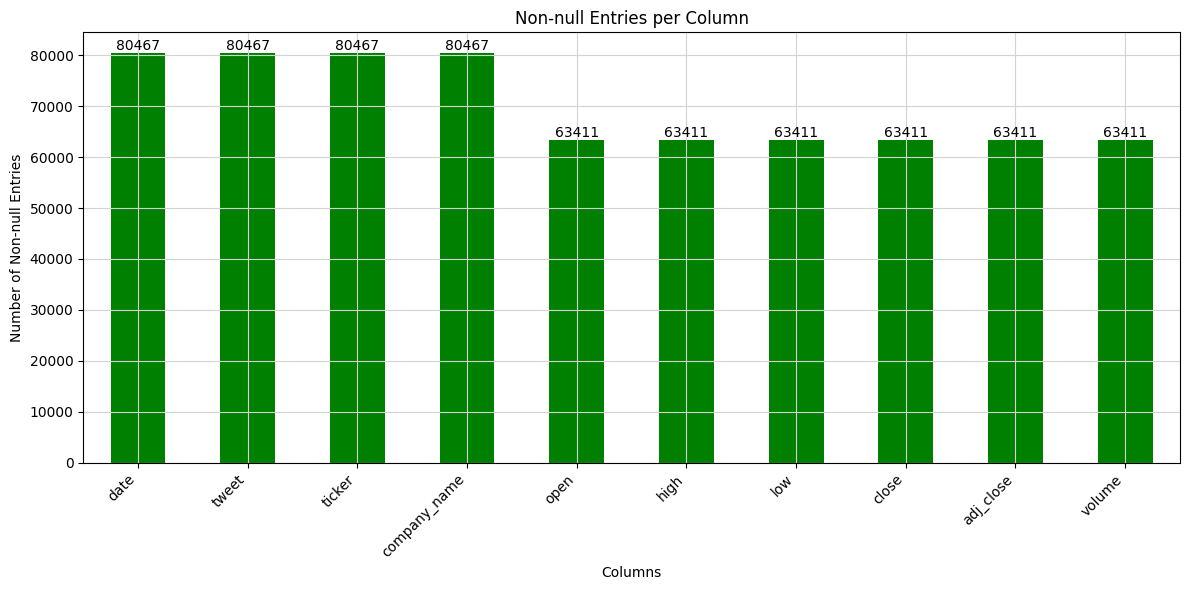

Plot successfully saved at saved_plots/Non_null_Entries_20250225_154159.png


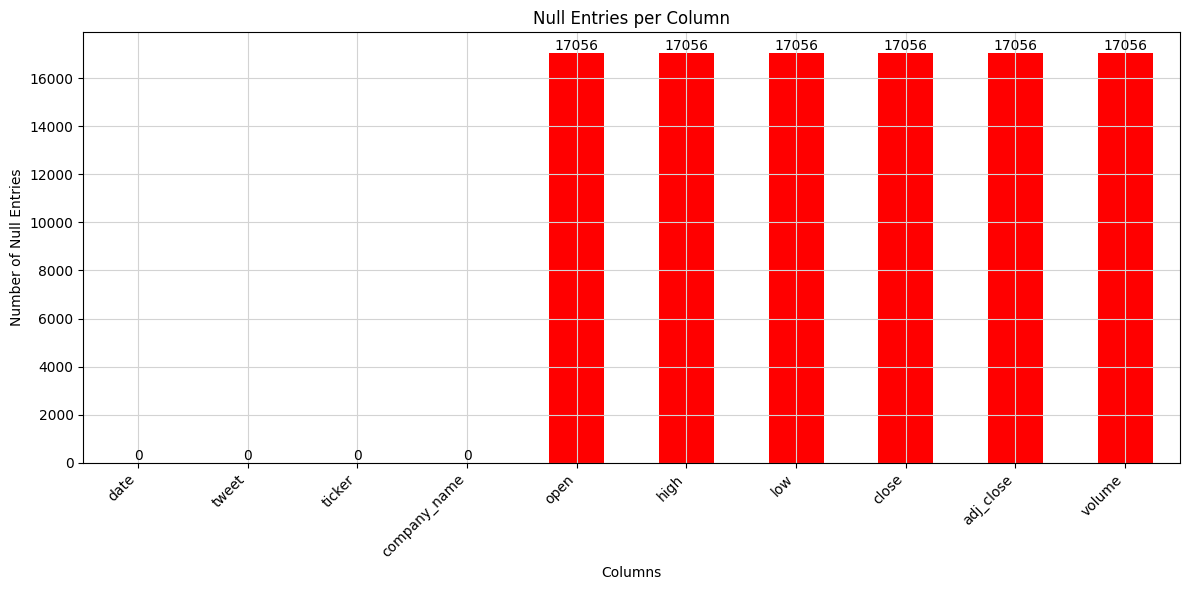

Plot successfully saved at saved_plots/Null_Entries_20250225_154200.png


<Figure size 1200x600 with 0 Axes>

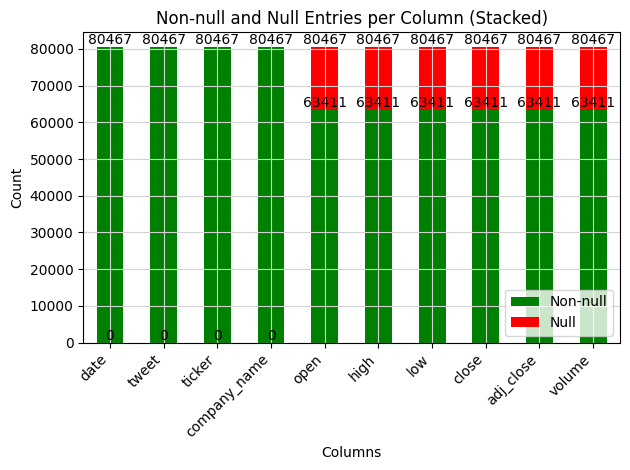

Plot successfully saved at saved_plots/Stacked_Null_NonNull_Entries_20250225_154200.png


In [110]:

# =========================
# Function to Visualize Non-Null and Null Counts in Dataset
# =========================
def plot_counts(merged_data, plot_type='stacked'):
    """
    Plot bar charts for non-null and null counts per column in the merged dataset.

    Parameters:
        merged_data (pd.DataFrame): The dataset for which counts will be calculated.
        plot_type (str): Type of visualization. Options:
            - 'non_null': Displays only non-null counts.
            - 'null': Displays only null counts.
            - 'stacked': Stacked bar chart showing both non-null and null counts. (Default)
    """

    # Calculate non-null and null counts for each column
    non_null_counts = merged_data.count()
    null_counts = merged_data.isnull().sum()

    # Plot non-null counts
    if plot_type == 'non_null':
        plt.figure(figsize=(12, 6))
        ax = non_null_counts.plot(kind='bar', color='green')
        plt.title('Non-null Entries per Column')
        plt.xlabel('Columns')
        plt.ylabel('Number of Non-null Entries')
        plt.xticks(rotation=45, ha='right')

        # Add labels
        for container in ax.containers:
            ax.bar_label(container)

        plt.tight_layout()
        save_and_show_plot("Non_null_Entries")

    # Plot null counts
    elif plot_type == 'null':
        plt.figure(figsize=(12, 6))
        ax = null_counts.plot(kind='bar', color='red')
        plt.title('Null Entries per Column')
        plt.xlabel('Columns')
        plt.ylabel('Number of Null Entries')
        plt.xticks(rotation=45, ha='right')

        # Add labels
        for container in ax.containers:
            ax.bar_label(container)

        plt.tight_layout()
        save_and_show_plot("Null_Entries")

    # Plot stacked counts
    elif plot_type == 'stacked':
        data_to_plot = pd.DataFrame({
            'Non-null': non_null_counts,
            'Null': null_counts
        })

        plt.figure(figsize=(12, 6))
        ax = data_to_plot.plot(kind='bar', stacked=True, color=['green', 'red'])
        plt.title('Non-null and Null Entries per Column (Stacked)')
        plt.xlabel('Columns')
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')

        # Add labels
        for container in ax.containers:
            ax.bar_label(container)

        plt.tight_layout()
        save_and_show_plot("Stacked_Null_NonNull_Entries")

    else:
        raise ValueError("Invalid plot_type. Choose from 'non_null', 'null', or 'stacked'.")

# =========================
# Generating Visualizations for Dataset Completeness
# =========================

# Plot non-null counts
plot_counts(merged_data, plot_type='non_null')

# Plot null counts
plot_counts(merged_data, plot_type='null')

# Plot stacked bar chart comparing non-null and null counts
plot_counts(merged_data, plot_type='stacked')


In [111]:
# =========================
# Checking and Removing Duplicate Rows from Merged Dataset
# =========================

# Display the shape of the dataset before removing duplicates
# Helps in identifying how many duplicate rows might be removed
print("Shape of the dataset before removing duplicates:", merged_data.shape)

# Remove duplicate rows from the merged dataset
# This step ensures only unique rows are retained
merged_data.drop_duplicates(inplace=True)

# Display the shape of the dataset after removing duplicates
# Confirms the reduction in dataset size after duplicate removal
print("Shape of the dataset after removing duplicates:", merged_data.shape)

# =========================
# Verification of Duplicate Removal
# =========================

# Count and display the number of remaining duplicate rows
remaining_duplicates = merged_data.duplicated().sum()
print(f"Number of remaining duplicate rows after removal: {remaining_duplicates}")

#Displaying the dataset after cleaning
print("Clean Dataset \n",merged_data.head())


Shape of the dataset before removing duplicates: (80467, 10)
Shape of the dataset after removing duplicates: (80467, 10)
Number of remaining duplicate rows after removal: 0
Clean Dataset 
          date                                              tweet ticker  \
0  2022-09-29  mainstream media done amazing job brainwashing...   TSLA   
1  2022-09-29      tesla delivery estimates around analysts tsla   TSLA   
2  2022-09-29  even include unvested rsus additional equity n...   TSLA   
3  2022-09-29  hahaha still trying stop tesla fsd bro get shi...   TSLA   
4  2022-09-29         stop trying kill kids sad deranged old man   TSLA   

  company_name       open        high         low       close   adj_close  \
0  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  268.209991   
1  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  268.209991   
2  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  268.209991   
3  Tesla, Inc.  282.76001  283.649994  265.779999  2

###EDA

In [112]:
#Copy the data
df_1 = merged_data.copy()
print(df_1.shape)
print("\nFirst 5 rows of Tweet Data:")
display(df_1.head())

(80467, 10)

First 5 rows of Tweet Data:


,date,tweet,ticker,company_name,open,high,low,close,adj_close,volume
0,2022-09-29,mainstream media done amazing job brainwashing...,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,268.209991,77620600.0
1,2022-09-29,tesla delivery estimates around analysts tsla,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,268.209991,77620600.0
2,2022-09-29,even include unvested rsus additional equity n...,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,268.209991,77620600.0
3,2022-09-29,hahaha still trying stop tesla fsd bro get shi...,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,268.209991,77620600.0
4,2022-09-29,stop trying kill kids sad deranged old man,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,268.209991,77620600.0


In [113]:
# =========================
# Feature Engineering: Adding Stock-Related Features
# =========================

# 1️ Basic Price Movement Features
# Calculate daily return as the percentage change from the opening to the closing price
df_1['daily_return'] = ((df_1['close'] - df_1['open']) / df_1['open']) * 100

# Calculate price change as the absolute difference between closing and opening prices
df_1['price_change'] = df_1['close'] - df_1['open']

# Calculate volatility as the percentage difference between the high and low prices
df_1['volatility'] = ((df_1['high'] - df_1['low']) / df_1['low']) * 100

# Calculate the price range (absolute high - low difference)
df_1['price_range'] = df_1['high'] - df_1['low']

# 2️ Moving Averages (Trend Indicators)
# Calculate 5-day and 10-day moving averages for closing prices
df_1['moving_average_5'] = df_1['close'].rolling(window=5).mean()
df_1['moving_average_10'] = df_1['close'].rolling(window=10).mean()

# Calculate exponential moving average over 10 days
df_1['exponential_moving_average_10'] = df_1['close'].ewm(span=10, adjust=False).mean()

# 3️ Volume-Based Features
# Calculate the percentage change in trading volume compared to the previous day
df_1['volume_change'] = df_1['volume'].pct_change() * 100

# Calculate a 5-day moving average of trading volume
df_1['volume_moving_average_5'] = df_1['volume'].rolling(window=5).mean()

# 4 Lag Features (Previous Day's Data)
# Previous day's closing price
df_1['previous_day_close'] = df_1['close'].shift(1)

# Previous day's return based on the closing price
df_1['previous_day_return'] = ((df_1['previous_day_close'] - df_1['close']) / df_1['previous_day_close']) * 100

# Lagged volatility from the past 3 days
df_1['lagged_volatility_3'] = df_1['volatility'].shift(3)



# =========================
# Verification of New Features
# =========================

# Display the shape of the dataset after adding new features
print("Shape of the dataset after adding new stock-related features:", df_1.shape)

# Preview the first 5 rows of the dataset with newly added features
print("\nFirst 5 rows of the dataset after feature engineering:")
display(df_1.head())


Shape of the dataset after adding new stock-related features: (80467, 22)

First 5 rows of the dataset after feature engineering:


,date,tweet,ticker,company_name,open,high,low,close,adj_close,volume,...,volatility,price_range,moving_average_5,moving_average_10,exponential_moving_average_10,volume_change,volume_moving_average_5,previous_day_close,previous_day_return,lagged_volatility_3
0,2022-09-29,mainstream media done amazing job brainwashing...,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,268.209991,77620600.0,...,6.723604,17.869995,NaN,NaN,268.209991,NaN,NaN,NaN,NaN,NaN
1,2022-09-29,tesla delivery estimates around analysts tsla,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,268.209991,77620600.0,...,6.723604,17.869995,NaN,NaN,268.209991,0.0,NaN,268.209991,0.0,NaN
2,2022-09-29,even include unvested rsus additional equity n...,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,268.209991,77620600.0,...,6.723604,17.869995,NaN,NaN,268.209991,0.0,NaN,268.209991,0.0,NaN
3,2022-09-29,hahaha still trying stop tesla fsd bro get shi...,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,268.209991,77620600.0,...,6.723604,17.869995,NaN,NaN,268.209991,0.0,NaN,268.209991,0.0,6.723604
4,2022-09-29,stop trying kill kids sad deranged old man,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,268.209991,77620600.0,...,6.723604,17.869995,268.209991,NaN,268.209991,0.0,77620600.0,268.209991,0.0,6.723604


In [114]:

def print_df_overview(df):
    """
    Print a detailed overview of a DataFrame.

    This function prints:
        - DataFrame info (summary including index dtype, columns, non-null values, etc.)
        - Descriptive statistics of numeric columns
        - Count of null (missing) values per column
        - Count of duplicate rows
        - Number of unique values per column
        - Column names
        - Data types of each column
        - Shape of the DataFrame (number of rows and columns)
        - Value counts for the 'ticker' column (if it exists)

    Parameters:
        df (pd.DataFrame): The DataFrame to be analyzed.
    """
    # Print basic information about the DataFrame
    print("DataFrame Info:")
    df.info()  # df.info() prints its output directly

    # Print descriptive statistics for numeric columns
    print("\nDataFrame Description:")
    print(df.describe())

    # Print the count of null (missing) values per column
    print("\nMissing Values (Null Count) per Column:")
    print(df.isnull().sum())

    # Print the total count of duplicate rows
    print("\nDuplicate Rows Count:")
    print(df.duplicated().sum())

    # Print the number of unique values for each column
    print("\nUnique Values per Column:")
    print(df.nunique())

    # Print the column names
    print("\nColumn Names:")
    print(list(df.columns))

    # Print the data types for each column
    print("\nData Types of Each Column:")
    print(df.dtypes)

    # Print the shape of the DataFrame (rows, columns)
    print("\nDataFrame Shape (Rows, Columns):")
    print(df.shape)

    # Print the value counts for the 'ticker' column if it exists
    if 'ticker' in df.columns:
        print("\nValue Counts for 'ticker' Column:")
        print(df['ticker'].value_counts())
    else:
        print("\nColumn 'ticker' does not exist in the DataFrame.")


print_df_overview(df_1)


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 80467 entries, 0 to 80768
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           80467 non-null  object 
 1   tweet                          80467 non-null  object 
 2   ticker                         80467 non-null  object 
 3   company_name                   80467 non-null  object 
 4   open                           63411 non-null  float64
 5   high                           63411 non-null  float64
 6   low                            63411 non-null  float64
 7   close                          63411 non-null  float64
 8   adj_close                      63411 non-null  float64
 9   volume                         63411 non-null  float64
 10  daily_return                   63411 non-null  float64
 11  price_change                   63411 non-null  float64
 12  volatility                     6341

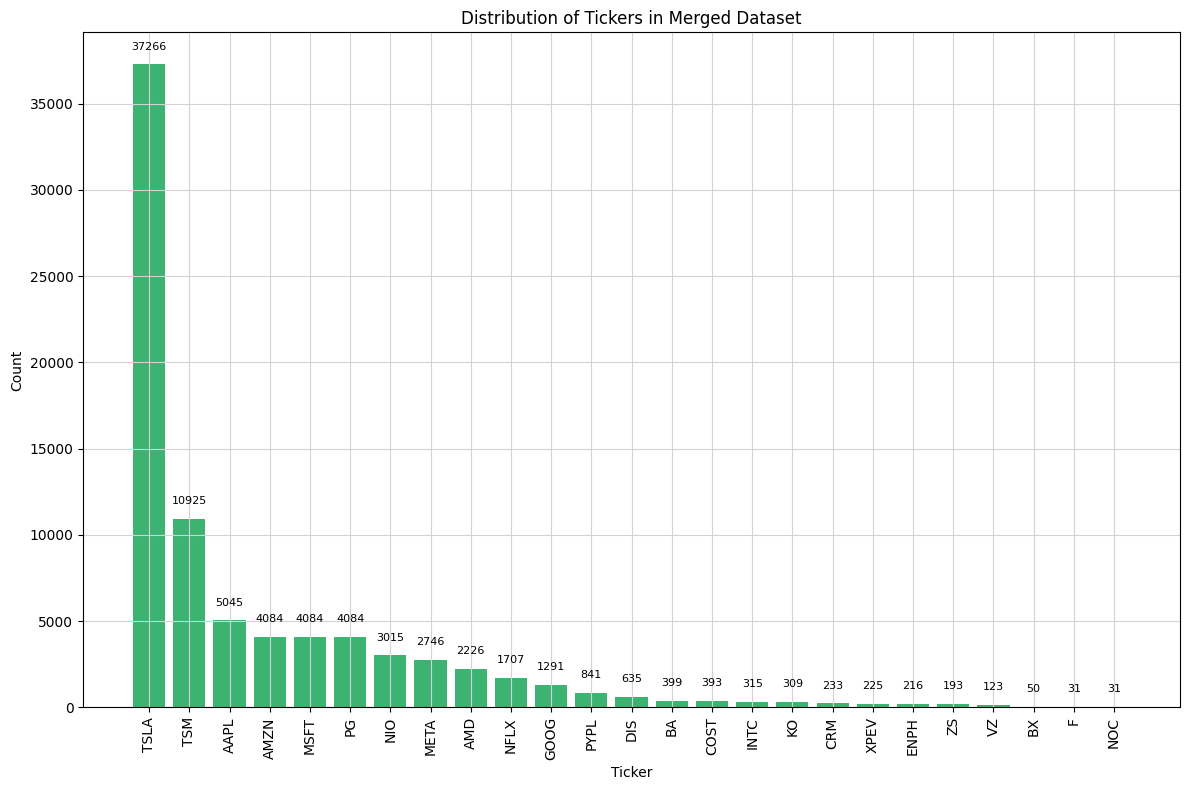

Plot successfully saved at saved_plots/Distribution_of_Tickers_in_Merged_Dataset_20250225_154202.png


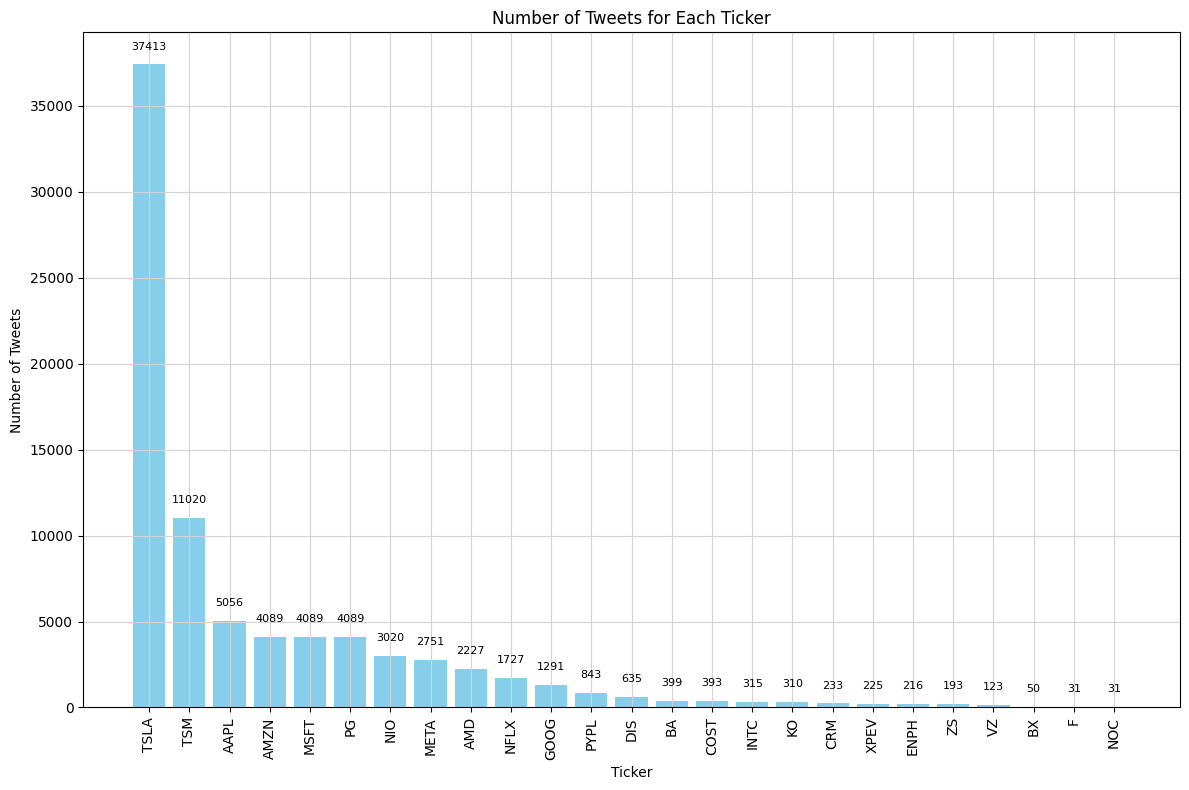

Plot successfully saved at saved_plots/Number_of_Tweets_for_Each_Ticker_20250225_154203.png
Tweet Counts per Ticker:
ticker
TSLA    37413
TSM     11020
AAPL     5056
AMZN     4089
MSFT     4089
PG       4089
NIO      3020
META     2751
AMD      2227
NFLX     1727
GOOG     1291
PYPL      843
DIS       635
BA        399
COST      393
INTC      315
KO        310
CRM       233
XPEV      225
ENPH      216
ZS        193
VZ        123
BX         50
F          31
NOC        31
Name: count, dtype: int64


In [115]:
# =========================
# Function to Plot and Save Ticker Distributions
# =========================
def plot_ticker_distributions(merged_df, tweet_df):
    """
    Plot and save the distribution of tickers for both the merged dataset and tweet dataset.

    Parameters:
        merged_df (pd.DataFrame): The merged dataset containing a 'ticker' column.
        tweet_df (pd.DataFrame): The tweet dataset containing a 'ticker' column.
    """

    # --- Plot 1: Distribution of Tickers in Merged Dataset ---
    # Calculate the count of each ticker in the merged dataset.
    value_count = merged_df['ticker'].value_counts()

    # Set the size of the plot.
    plt.figure(figsize=(12, 8))

    # Create a bar plot for tickers and their counts.
    plt.bar(value_count.index, value_count, color='mediumseagreen')

    # Add title and axis labels.
    plt.title('Distribution of Tickers in Merged Dataset')
    plt.xlabel('Ticker')
    plt.ylabel('Count')

    # Add count labels above each bar.
    for i, count in enumerate(value_count):
        plt.text(i, count + 0.02 * max(value_count), str(count), ha='center', va='bottom', fontsize=8)

    # Rotate x-axis labels for better readability.
    plt.xticks(rotation=90)

    # Adjust layout to ensure no overlapping elements.
    plt.tight_layout()

    # Save and display the plot.
    save_and_show_plot("Distribution_of_Tickers_in_Merged_Dataset")

    # --- Plot 2: Number of Tweets for Each Ticker ---
    # Calculate the count of tweets for each ticker in the tweet dataset.
    tweet_counts = tweet_df['ticker'].value_counts()

    # Set the size of the plot.
    plt.figure(figsize=(12, 8))

    # Create a bar plot for the tweet counts.
    plt.bar(tweet_counts.index, tweet_counts, color='skyblue')

    # Add title and axis labels.
    plt.title('Number of Tweets for Each Ticker')
    plt.xlabel('Ticker')
    plt.ylabel('Number of Tweets')

    # Add count labels above each bar.
    for i, count in enumerate(tweet_counts):
        plt.text(i, count + 0.02 * max(tweet_counts), str(count), ha='center', va='bottom', fontsize=8)

    # Rotate x-axis labels for better readability.
    plt.xticks(rotation=90)

    # Adjust layout to prevent overlap.
    plt.tight_layout()

    # Save and display the plot.
    save_and_show_plot("Number_of_Tweets_for_Each_Ticker")

    # Print tweet counts directly for reference.
    print("Tweet Counts per Ticker:")
    print(tweet_counts)


# =========================
# Generate and Save Ticker Distribution Visualizations
# =========================

plot_ticker_distributions(df_1, tweet_data_cleaned)


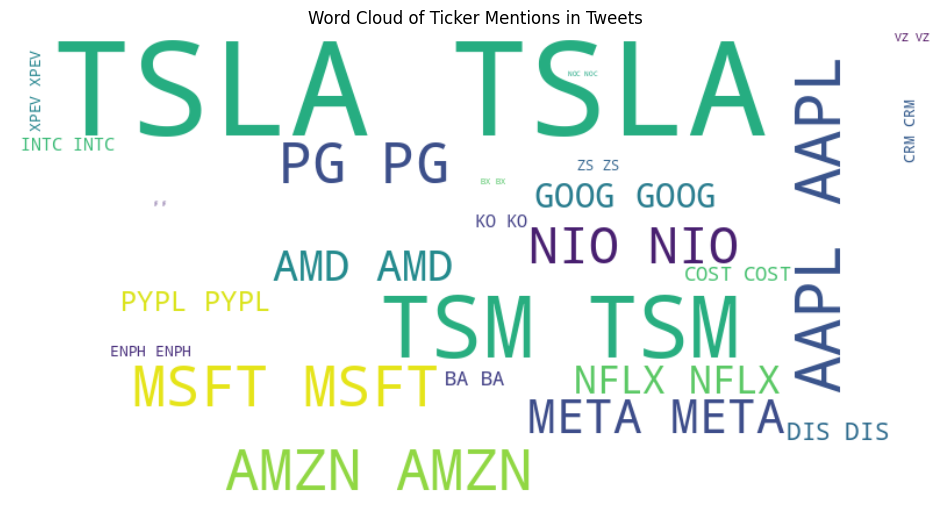

Plot successfully saved at saved_plots/Word_Cloud_Ticker_Mentions_20250225_154204.png


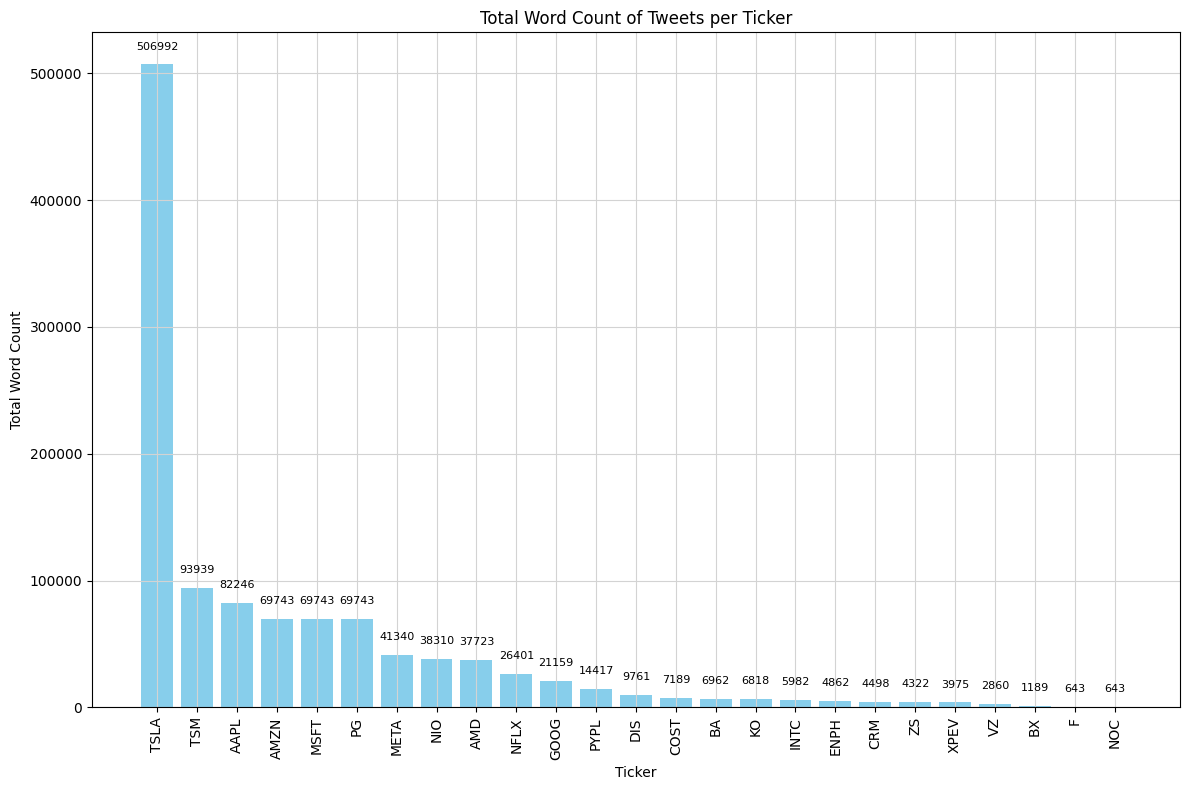

Plot successfully saved at saved_plots/Total_Word_Count_Per_Ticker_20250225_154205.png
Total Word Count per Ticker:
ticker
TSLA    506992
TSM      93939
AAPL     82246
AMZN     69743
MSFT     69743
PG       69743
META     41340
NIO      38310
AMD      37723
NFLX     26401
GOOG     21159
PYPL     14417
DIS       9761
COST      7189
BA        6962
KO        6818
INTC      5982
ENPH      4862
CRM       4498
ZS        4322
XPEV      3975
VZ        2860
BX        1189
F          643
NOC        643
Name: word_count, dtype: int64


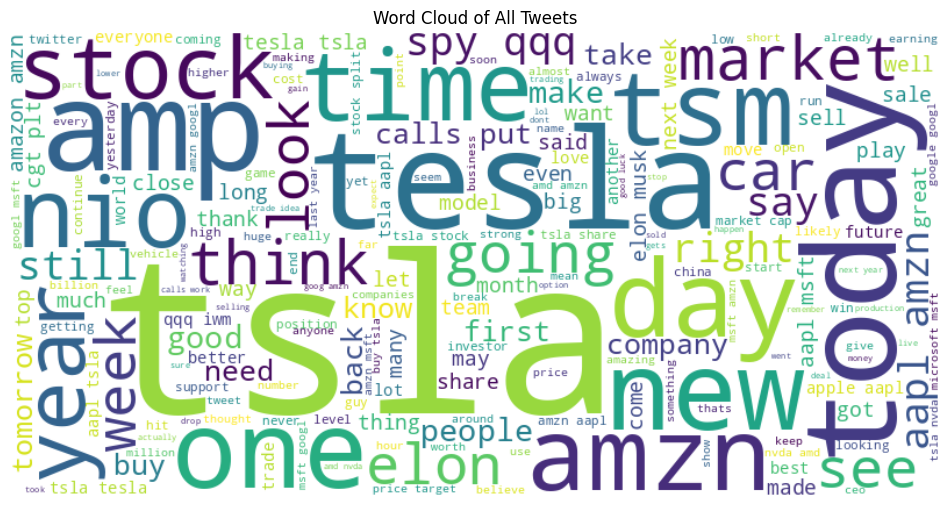

Plot successfully saved at saved_plots/Word_Cloud_All_Tweets_20250225_154212.png


In [116]:
def plot_ticker_and_tweet_visualizations(df):
    """
    Generates and saves visualizations for 'ticker' and 'tweet' data.

    Visualizations:
    1. Word Cloud of Ticker Mentions
    2. Bar Plot of Total Word Count Per Ticker
    3. Word Cloud of All Tweet Texts
    """

    # Ensure the 'ticker' and 'tweet' columns are string types
    df['ticker'] = df['ticker'].astype(str)
    df['tweet'] = df['tweet'].astype(str)

    # Word Cloud of Ticker Mentions
    ticker_text = ' '.join(df['ticker'])
    ticker_wordcloud = WordCloud(background_color='white', width=800, height=400).generate(ticker_text)

    plt.figure(figsize=(12, 8))
    plt.imshow(ticker_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of Ticker Mentions in Tweets")
    save_and_show_plot("Word_Cloud_Ticker_Mentions")

    # Bar Plot: Total Word Count of Tweets Per Ticker
    df['word_count'] = df['tweet'].apply(lambda x: len(x.split()))
    total_word_count_per_ticker = df.groupby('ticker')['word_count'].sum().sort_values(ascending=False)

    plt.figure(figsize=(12, 8))
    plt.bar(total_word_count_per_ticker.index, total_word_count_per_ticker, color='skyblue')
    plt.title('Total Word Count of Tweets per Ticker')
    plt.xlabel('Ticker')
    plt.ylabel('Total Word Count')

    # Add count labels on top of bars
    for i, count in enumerate(total_word_count_per_ticker):
        plt.text(i, count + 0.02 * max(total_word_count_per_ticker), str(count), ha='center', va='bottom', fontsize=8)

    plt.xticks(rotation=90)
    plt.tight_layout()
    save_and_show_plot("Total_Word_Count_Per_Ticker")

    # Print the total word count per ticker for reference
    print("Total Word Count per Ticker:")
    print(total_word_count_per_ticker)

    # Word Cloud of All Tweets
    all_tweets_text = ' '.join(df['tweet'])
    tweets_wordcloud = WordCloud(background_color='white', width=800, height=400, max_words=200, colormap='viridis').generate(all_tweets_text)

    plt.figure(figsize=(12, 8))
    plt.imshow(tweets_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of All Tweets")
    save_and_show_plot("Word_Cloud_All_Tweets")


# Call the visualization function on your dataset
plot_ticker_and_tweet_visualizations(df_1)


In [117]:
df_1

,date,tweet,ticker,company_name,open,high,low,close,adj_close,volume,...,price_range,moving_average_5,moving_average_10,exponential_moving_average_10,volume_change,volume_moving_average_5,previous_day_close,previous_day_return,lagged_volatility_3,word_count
0,2022-09-29,mainstream media done amazing job brainwashing...,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,268.209991,77620600.0,...,17.869995,NaN,NaN,268.209991,NaN,NaN,NaN,NaN,NaN,27
1,2022-09-29,tesla delivery estimates around analysts tsla,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,268.209991,77620600.0,...,17.869995,NaN,NaN,268.209991,0.000000,NaN,268.209991,0.000000,NaN,6
2,2022-09-29,even include unvested rsus additional equity n...,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,268.209991,77620600.0,...,17.869995,NaN,NaN,268.209991,0.000000,NaN,268.209991,0.000000,NaN,22
3,2022-09-29,hahaha still trying stop tesla fsd bro get shi...,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,268.209991,77620600.0,...,17.869995,NaN,NaN,268.209991,0.000000,NaN,268.209991,0.000000,6.723604,23
4,2022-09-29,stop trying kill kids sad deranged old man,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,268.209991,77620600.0,...,17.869995,268.209991,NaN,268.209991,0.000000,77620600.0,268.209991,0.000000,6.723604,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80764,2021-10-07,fastest growing tech stocks market mix upst xp...,XPEV,XPeng Inc.,36.900002,38.880001,36.840000,38.259998,38.259998,12748700.0,...,2.040001,NaN,NaN,40.071779,195.177124,NaN,NaN,NaN,3.198921,9
80765,2021-10-04,earnings horizon quick snapshot largest increa...,XPEV,XPeng Inc.,35.180000,35.200001,33.520000,34.110001,34.110001,6557200.0,...,1.680000,NaN,NaN,38.987819,-48.565736,NaN,38.259998,10.846832,2.891571,23
80766,2021-10-01,record delivery results testimony unwavering p...,XPEV,XPeng Inc.,36.750000,36.759998,35.080002,35.459999,35.459999,7770600.0,...,1.679996,NaN,NaN,38.346397,18.504850,NaN,34.110001,-3.957779,NaN,15
80767,2021-10-01,delivered smart evs sep reaching milestone uni...,XPEV,XPeng Inc.,36.750000,36.759998,35.080002,35.459999,35.459999,7770600.0,...,1.679996,NaN,NaN,37.821598,0.000000,NaN,35.459999,0.000000,5.537462,19


In [118]:
df_1['date'] = pd.to_datetime(df_1['date'], errors='coerce').dt.date

In [119]:
def download_nltk_resources():
    """
    Download necessary NLTK resources for text processing.

    This function downloads the following resources:
      - 'stopwords': A list of common stopwords for various languages.
      - 'punkt': Tokenizer for sentences and words.
      - 'wordnet': A lexical database for the English language.
      - 'omw-1.4': Open Multilingual WordNet data.
      - 'punkt_tab': A variant of the 'punkt' tokenizer.

    It prints a confirmation message after each resource is downloaded.
    """
    # List of required NLTK resources.
    resources = ['stopwords', 'punkt', 'wordnet', 'omw-1.4', 'punkt_tab']

    # Loop through each resource and download it.
    for resource in resources:
        nltk.download(resource)
        print(f"Downloaded NLTK resource: {resource}")

download_nltk_resources()


Downloaded NLTK resource: stopwords
Downloaded NLTK resource: punkt
Downloaded NLTK resource: wordnet
Downloaded NLTK resource: omw-1.4
Downloaded NLTK resource: punkt_tab


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [120]:


def download_and_tokenize_tweets(df, tweet_column='tweet'):
    """
    Downloads the necessary NLTK resource, tokenizes the tweet text, and adds a 'tokens' column.

    This function performs the following steps:
      1. Downloads the 'punkt' resource required for tokenization.
      2. Ensures the tweet column is in string format.
      3. Applies tokenization to each tweet in the specified column using a progress bar.
      4. Returns the DataFrame with an additional 'tokens' column containing tokenized words.

    Parameters:
        df (pd.DataFrame): DataFrame containing tweet data.
        tweet_column (str): The name of the column containing tweet text.
                            Default is 'tweet'.

    Returns:
        pd.DataFrame: The DataFrame with an added 'tokens' column.
    """
    # Download the NLTK 'punkt' resource (if not already downloaded)
    nltk.download('punkt')

    # Ensure the tweet column is of string type to avoid any issues during tokenization.
    df[tweet_column] = df[tweet_column].astype(str)

    # Initialize tqdm for progress bar usage.
    tqdm.pandas()

    def tokenize_tweet(text):
        """
        Tokenizes tweet text into individual words.

        Parameters:
            text (str): The tweet text.

        Returns:
            list: A list of word tokens, or an empty list if text is null.
        """
        if pd.isnull(text):
            return []
        return word_tokenize(text)

    # Apply tokenization to the tweet column using tqdm's progress_apply.
    df['tokens'] = df[tweet_column].progress_apply(tokenize_tweet)
    print("Tokenization completed.")

    return df


df_1_tokenized = download_and_tokenize_tweets(df_1, tweet_column='tweet')
print(df_1_tokenized.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████| 80467/80467 [00:06<00:00, 11935.83it/s]

Tokenization completed.
         date                                              tweet ticker  \
0  2022-09-29  mainstream media done amazing job brainwashing...   TSLA   
1  2022-09-29      tesla delivery estimates around analysts tsla   TSLA   
2  2022-09-29  even include unvested rsus additional equity n...   TSLA   
3  2022-09-29  hahaha still trying stop tesla fsd bro get shi...   TSLA   
4  2022-09-29         stop trying kill kids sad deranged old man   TSLA   

  company_name       open        high         low       close   adj_close  \
0  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  268.209991   
1  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  268.209991   
2  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  268.209991   
3  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  268.209991   
4  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  268.209991   

       volume  ...  moving_average_5  moving_average_10  \
0  

In [121]:


def remove_stopwords_from_tokens(df, tokens_column='tokens'):
    """
    Downloads the necessary NLTK stopwords resource, loads the English stopwords list,
    and removes stopwords from the tokens in the specified DataFrame column.

    This function performs the following steps:
      1. Downloads the 'stopwords' resource if it's not already available.
      2. Loads the English stopwords list from NLTK.
      3. Defines a helper function to remove stopwords from a list of tokens.
      4. Applies the stopwords removal function on the specified tokens column using tqdm's progress bar.
      5. Creates a new column 'filtered_tokens' with the tokens after stopwords removal.
      6. Prints a confirmation message and returns the updated DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame containing tokenized data.
        tokens_column (str): The name of the column containing the tokenized text. Default is 'tokens'.

    Returns:
        pd.DataFrame: The updated DataFrame with an added 'filtered_tokens' column.
    """
    # Download the NLTK stopwords resource (if not already downloaded)
    nltk.download('stopwords')

    # Load the English stopwords list from NLTK
    stop_words = set(stopwords.words('english'))

    def remove_stopwords(tokens):
        """
        Removes stopwords from a list of tokens.

        Parameters:
            tokens (list): A list of word tokens.

        Returns:
            list: A list of tokens with stopwords removed, or an empty list if input is not a list.
        """
        if not isinstance(tokens, list):
            return []
        return [word for word in tokens if word.lower() not in stop_words]

    # Enable tqdm progress bar for pandas apply
    tqdm.pandas()

    # Apply stopwords removal on the tokens column and store results in 'filtered_tokens'
    df['filtered_tokens'] = df[tokens_column].progress_apply(remove_stopwords)
    print("Stop words removal completed.")

    return df


# Assuming 'df_1_tokenized' is your DataFrame with a 'tokens' column:
df_1_no_stopwords = remove_stopwords_from_tokens(df_1_tokenized, tokens_column='tokens')
print(df_1_no_stopwords.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 80467/80467 [00:01<00:00, 73947.47it/s]

Stop words removal completed.
         date                                              tweet ticker  \
0  2022-09-29  mainstream media done amazing job brainwashing...   TSLA   
1  2022-09-29      tesla delivery estimates around analysts tsla   TSLA   
2  2022-09-29  even include unvested rsus additional equity n...   TSLA   
3  2022-09-29  hahaha still trying stop tesla fsd bro get shi...   TSLA   
4  2022-09-29         stop trying kill kids sad deranged old man   TSLA   

  company_name       open        high         low       close   adj_close  \
0  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  268.209991   
1  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  268.209991   
2  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  268.209991   
3  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  268.209991   
4  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  268.209991   

       volume  ...  moving_average_10  exponential_movin

In [122]:


def apply_lemmatization_to_tokens(df, tokens_column='filtered_tokens'):
    """
    Downloads necessary NLTK resources for lemmatization and applies lemmatization to tokens in a specified column.

    This function performs the following steps:
      1. Downloads the 'wordnet' and 'omw-1.4' resources if not already available.
      2. Initializes a WordNetLemmatizer.
      3. Defines a helper function to lemmatize a list of tokens.
      4. Applies the lemmatization function to each row of the specified tokens column using tqdm's progress bar.
      5. Stores the lemmatized tokens in a new column called 'lemmatized_tokens'.
      6. Returns the updated DataFrame.

    Parameters:
        df (pd.DataFrame): DataFrame containing tokenized data.
        tokens_column (str): The name of the column containing the tokens to be lemmatized.
                             Default is 'filtered_tokens'.

    Returns:
        pd.DataFrame: The updated DataFrame with an added 'lemmatized_tokens' column.
    """
    # Download required NLTK resources for lemmatization
    nltk.download('wordnet')
    nltk.download('omw-1.4')

    # Initialize the WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()

    def lemmatize_tokens(tokens):
        """
        Lemmatizes a list of tokens.

        Parameters:
            tokens (list): A list of tokens.

        Returns:
            list: A list of lemmatized tokens, or an empty list if input is not a list.
        """
        if not isinstance(tokens, list):
            return []
        return [lemmatizer.lemmatize(token) for token in tokens]

    # Enable tqdm progress bar for pandas apply
    tqdm.pandas()

    # Apply the lemmatization function to the specified tokens column and store the results in 'lemmatized_tokens'
    df['lemmatized_tokens'] = df[tokens_column].progress_apply(lemmatize_tokens)
    print("Lemmatization completed.")

    return df


# Assuming df_1_no_stopwords is your DataFrame containing a 'filtered_tokens' column:
df_1_lemmatized = apply_lemmatization_to_tokens(df_1_no_stopwords, tokens_column='filtered_tokens')
print(df_1_lemmatized.head())


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
100%|██████████| 80467/80467 [00:04<00:00, 18653.03it/s]

Lemmatization completed.
         date                                              tweet ticker  \
0  2022-09-29  mainstream media done amazing job brainwashing...   TSLA   
1  2022-09-29      tesla delivery estimates around analysts tsla   TSLA   
2  2022-09-29  even include unvested rsus additional equity n...   TSLA   
3  2022-09-29  hahaha still trying stop tesla fsd bro get shi...   TSLA   
4  2022-09-29         stop trying kill kids sad deranged old man   TSLA   

  company_name       open        high         low       close   adj_close  \
0  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  268.209991   
1  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  268.209991   
2  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  268.209991   
3  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  268.209991   
4  Tesla, Inc.  282.76001  283.649994  265.779999  268.209991  268.209991   

       volume  ...  exponential_moving_average_10  volume_cha

In [123]:
def apply_financial_keywords_extraction(df, tokens_column='lemmatized_tokens'):
    """
    Counts financial-related keywords in tokenized tweets and adds a new column with the counts.

    This function performs the following steps:
      1. Defines an expanded list of financial-related keywords.
      2. Defines a helper function to count the number of financial keywords present in a list of tokens.
      3. Applies the helper function to each row in the specified tokens column using a progress bar.
      4. Stores the count in a new column 'financial_keyword_count'.

    Parameters:
        df (pd.DataFrame): The DataFrame containing tokenized tweet data.
        tokens_column (str): The name of the column containing tokenized text.
                             Default is 'lemmatized_tokens'.

    Returns:
        pd.DataFrame: The updated DataFrame with an added 'financial_keyword_count' column.
    """
    # Expanded list of financial-related keywords
    financial_keywords = [
        # Basic Finance Terms
        'profit', 'loss', 'revenue', 'growth', 'investment', 'dividend', 'portfolio', 'capital',
        'liquidity', 'merger', 'acquisition', 'stock', 'market', 'share', 'earnings', 'valuation',
        'bond', 'fund', 'equity', 'broker', 'index', 'exchange', 'asset', 'liability', 'return',

        # Trading and Market Terms
        'bullish', 'bearish', 'rally', 'slump', 'crash', 'surge', 'plummet', 'breakout', 'resistance', 'support',
        'short', 'long', 'buy', 'sell', 'hold', 'volume', 'volatility', 'momentum', 'divergence', 'correction',
        'trend', 'consolidation', 'liquidation', 'margin', 'leverage', 'stoploss', 'takeprofit', 'hedge',

        # Financial Ratios & Metrics
        'pe', 'p/e', 'eps', 'ebitda', 'debt', 'roi', 'roe', 'roa', 'cashflow', 'dividend_yield', 'valuation',
        'net_income', 'gross_margin', 'operating_margin', 'price_target', 'beta', 'book_value', 'market_cap',

        # Economic Indicators
        'inflation', 'deflation', 'interest_rate', 'gdp', 'unemployment', 'consumer_confidence', 'cpi', 'ppi',
        'recession', 'stimulus', 'quantitative_easing', 'federal_reserve', 'central_bank', 'treasury', 'bond_yield',

        # Company Actions
        'buyback', 'split', 'ipo', 'spinoff', 'dividend_increase', 'dividend_cut', 'earnings_report', 'forecast',

        # Sentiment & News Indicators
        'upgrade', 'downgrade', 'forecast', 'outlook', 'guidance', 'beat', 'miss', 'surpass', 'disappoint',

        # Cryptocurrencies & Modern Finance
        'crypto', 'bitcoin', 'ethereum', 'blockchain', 'nft', 'token', 'defi', 'exchange_traded_fund', 'etf'
    ]

    def count_financial_keywords(tokens):
        """
        Counts the number of financial-related keywords in a list of tokens.

        Parameters:
            tokens (list): A list of tokenized words.

        Returns:
            int: The count of financial keywords present in the tokens list.
        """
        if not isinstance(tokens, list):
            return 0
        return sum(1 for word in tokens if word in financial_keywords)

    # Enable progress bar for the apply function using tqdm.
    tqdm.pandas()

    # Apply the count function to the tokens column and create a new column 'financial_keyword_count'
    df['financial_keyword_count'] = df[tokens_column].progress_apply(count_financial_keywords)

    print("Financial keyword extraction completed.")
    return df


df_1_financial = apply_financial_keywords_extraction(df_1_lemmatized, tokens_column='lemmatized_tokens')
print(df_1_financial[['ticker', 'tweet', 'financial_keyword_count']].head())


100%|██████████| 80467/80467 [00:01<00:00, 49377.46it/s]

Financial keyword extraction completed.
  ticker                                              tweet  \
0   TSLA  mainstream media done amazing job brainwashing...   
1   TSLA      tesla delivery estimates around analysts tsla   
2   TSLA  even include unvested rsus additional equity n...   
3   TSLA  hahaha still trying stop tesla fsd bro get shi...   
4   TSLA         stop trying kill kids sad deranged old man   

   financial_keyword_count  
0                        0  
1                        0  
2                        3  
3                        0  
4                        0  


In [124]:
df_1_lemmatized

,date,tweet,ticker,company_name,open,high,low,close,adj_close,volume,...,volume_change,volume_moving_average_5,previous_day_close,previous_day_return,lagged_volatility_3,word_count,tokens,filtered_tokens,lemmatized_tokens,financial_keyword_count
0,2022-09-29,mainstream media done amazing job brainwashing...,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,268.209991,77620600.0,...,NaN,NaN,NaN,NaN,NaN,27,"[mainstream, media, done, amazing, job, brainw...","[mainstream, media, done, amazing, job, brainw...","[mainstream, medium, done, amazing, job, brain...",0
1,2022-09-29,tesla delivery estimates around analysts tsla,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,268.209991,77620600.0,...,0.000000,NaN,268.209991,0.000000,NaN,6,"[tesla, delivery, estimates, around, analysts,...","[tesla, delivery, estimates, around, analysts,...","[tesla, delivery, estimate, around, analyst, t...",0
2,2022-09-29,even include unvested rsus additional equity n...,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,268.209991,77620600.0,...,0.000000,NaN,268.209991,0.000000,NaN,22,"[even, include, unvested, rsus, additional, eq...","[even, include, unvested, rsus, additional, eq...","[even, include, unvested, rsus, additional, eq...",3
3,2022-09-29,hahaha still trying stop tesla fsd bro get shi...,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,268.209991,77620600.0,...,0.000000,NaN,268.209991,0.000000,6.723604,23,"[hahaha, still, trying, stop, tesla, fsd, bro,...","[hahaha, still, trying, stop, tesla, fsd, bro,...","[hahaha, still, trying, stop, tesla, fsd, bro,...",0
4,2022-09-29,stop trying kill kids sad deranged old man,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,268.209991,77620600.0,...,0.000000,77620600.0,268.209991,0.000000,6.723604,8,"[stop, trying, kill, kids, sad, deranged, old,...","[stop, trying, kill, kids, sad, deranged, old,...","[stop, trying, kill, kid, sad, deranged, old, ...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80764,2021-10-07,fastest growing tech stocks market mix upst xp...,XPEV,XPeng Inc.,36.900002,38.880001,36.840000,38.259998,38.259998,12748700.0,...,195.177124,NaN,NaN,NaN,3.198921,9,"[fastest, growing, tech, stocks, market, mix, ...","[fastest, growing, tech, stocks, market, mix, ...","[fastest, growing, tech, stock, market, mix, u...",2
80765,2021-10-04,earnings horizon quick snapshot largest increa...,XPEV,XPeng Inc.,35.180000,35.200001,33.520000,34.110001,34.110001,6557200.0,...,-48.565736,NaN,38.259998,10.846832,2.891571,23,"[earnings, horizon, quick, snapshot, largest, ...","[earnings, horizon, quick, snapshot, largest, ...","[earnings, horizon, quick, snapshot, largest, ...",3
80766,2021-10-01,record delivery results testimony unwavering p...,XPEV,XPeng Inc.,36.750000,36.759998,35.080002,35.459999,35.459999,7770600.0,...,18.504850,NaN,34.110001,-3.957779,NaN,15,"[record, delivery, results, testimony, unwaver...","[record, delivery, results, testimony, unwaver...","[record, delivery, result, testimony, unwaveri...",0
80767,2021-10-01,delivered smart evs sep reaching milestone uni...,XPEV,XPeng Inc.,36.750000,36.759998,35.080002,35.459999,35.459999,7770600.0,...,0.000000,NaN,35.459999,0.000000,5.537462,19,"[delivered, smart, evs, sep, reaching, milesto...","[delivered, smart, evs, sep, reaching, milesto...","[delivered, smart, ev, sep, reaching, mileston...",0


Unique ticker mention counts:
      ticker  ticker_mention_count
0       TSLA                 37266
37413   MSFT                  4084
41502     PG                  4084
45591   META                  2746
48342   AMZN                  4084


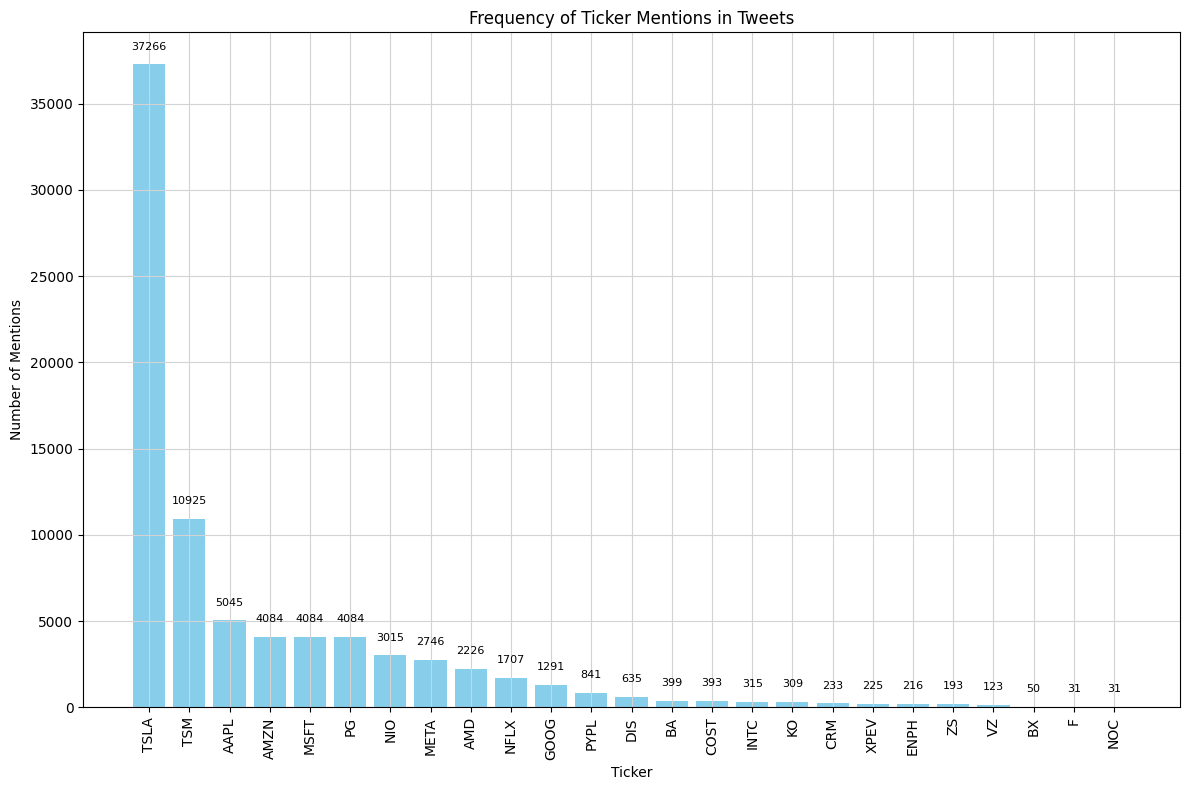

Plot successfully saved at saved_plots/Ticker_Mention_Frequency_20250225_154227.png


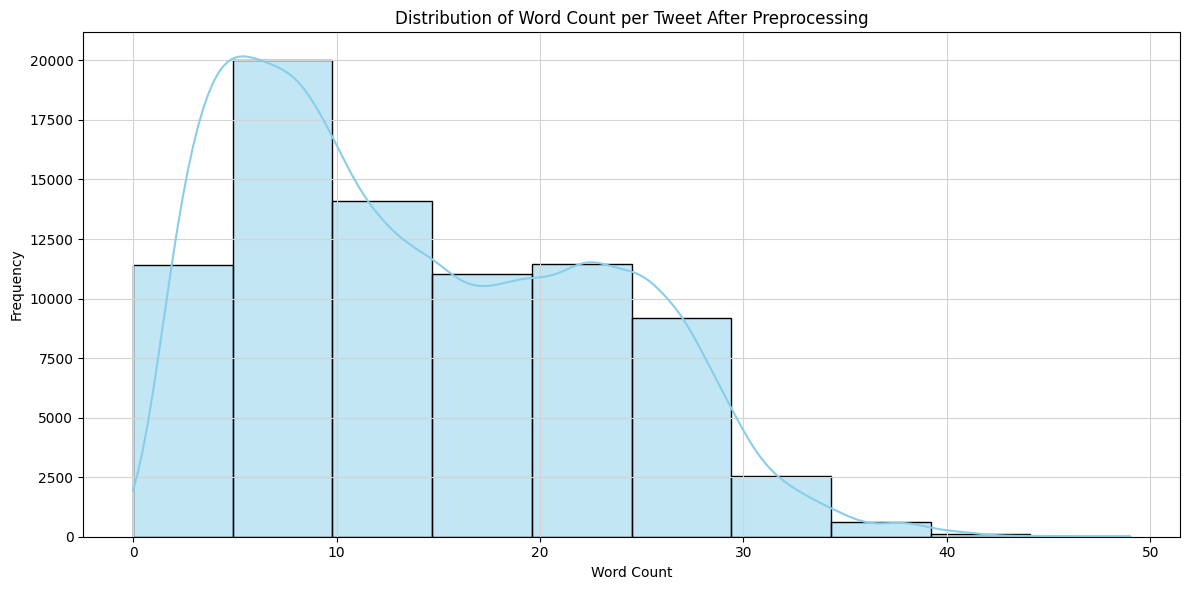

Plot successfully saved at saved_plots/Word_Count_Distribution_Per_Tweet_20250225_154229.png
Average word count per ticker:
ticker
BX      23.780000
VZ      23.252033
ENPH    22.509259
ZS      22.393782
KO      22.064725
F       20.741935
NOC     20.741935
CRM     19.304721
INTC    18.990476
COST    18.292621
XPEV    17.666667
BA      17.448622
PYPL    17.142687
MSFT    17.077130
PG      17.077130
AMZN    17.077130
AMD     16.946541
GOOG    16.389620
AAPL    16.302478
NFLX    15.466315
DIS     15.371654
META    15.054625
TSLA    13.604680
NIO     12.706468
TSM      8.598535
Name: word_count, dtype: float64
Total word count before preprocessing: 1131460
Total word count after preprocessing: 1131460
Word count reduced by: 0.0% after preprocessing.


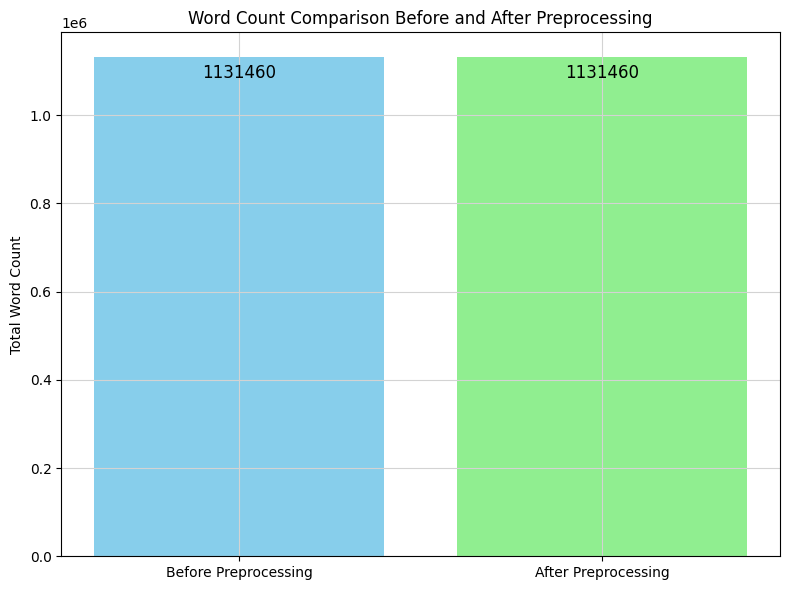

Plot successfully saved at saved_plots/Word_Count_Comparison_20250225_154230.png


In [125]:
def visualize_financial_analysis(df_1_financial):
    """
    Performs financial analysis visualizations on the df_1_financial DataFrame.

    Visualizations:
      1. Frequency of Ticker Mentions
      2. Word Count Distribution per Tweet
      3. Average Word Count per Ticker
      4. Word Count Comparison Before and After Preprocessing
    """

    # 1. Ticker Mention Count
    ticker_mentions = df_1_financial['ticker'].value_counts().to_dict()
    df_1_financial['ticker_mention_count'] = df_1_financial['ticker'].map(ticker_mentions)
    unique_ticker_mentions = df_1_financial[['ticker', 'ticker_mention_count']].drop_duplicates()
    print("Unique ticker mention counts:")
    print(unique_ticker_mentions.head())

    # Plot: Frequency of Ticker Mentions
    ticker_mentions_df = pd.DataFrame(list(ticker_mentions.items()), columns=['ticker', 'mention_count']).sort_values(by='mention_count', ascending=False)
    plt.figure(figsize=(12, 8))
    plt.bar(ticker_mentions_df['ticker'], ticker_mentions_df['mention_count'], color='skyblue')
    plt.title('Frequency of Ticker Mentions in Tweets')
    plt.xlabel('Ticker')
    plt.ylabel('Number of Mentions')
    plt.xticks(rotation=90)

    for i, count in enumerate(ticker_mentions_df['mention_count']):
        plt.text(i, count + 0.02 * max(ticker_mentions_df['mention_count']), str(count), ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    save_and_show_plot("Ticker_Mention_Frequency")

    # 2. Word Count Distribution per Tweet
    df_1_financial['word_count'] = df_1_financial['tweet'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
    plt.figure(figsize=(12, 6))
    sns.histplot(df_1_financial['word_count'], bins=10, kde=True, color='skyblue')
    plt.title('Distribution of Word Count per Tweet After Preprocessing')
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.tight_layout()
    save_and_show_plot("Word_Count_Distribution_Per_Tweet")

    # 3. Average Word Count per Ticker
    average_word_count = df_1_financial.groupby('ticker')['word_count'].mean().sort_values(ascending=False)
    print("Average word count per ticker:")
    print(average_word_count)

    # 4. Word Count Comparison Before and After Preprocessing
    total_word_count = df_1_financial['tweet'].str.split().str.len().sum()
    total_word_count_preprocessing = df_1_financial['tweet'].str.split().str.len().sum()

    print(f'Total word count before preprocessing: {int(total_word_count)}')
    print(f'Total word count after preprocessing: {int(total_word_count_preprocessing)}')

    percentage_reduction = round((total_word_count - total_word_count_preprocessing) / total_word_count * 100, 2)
    print(f'Word count reduced by: {percentage_reduction}% after preprocessing.')

    # Plotting word count comparison
    word_counts = [total_word_count, total_word_count_preprocessing]
    labels = ['Before Preprocessing', 'After Preprocessing']

    plt.figure(figsize=(8, 6))
    bars = plt.bar(labels, word_counts, color=['skyblue', 'lightgreen'])
    plt.title('Word Count Comparison Before and After Preprocessing')
    plt.ylabel('Total Word Count')

    for bar, count in zip(bars, word_counts):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - (0.05 * max(word_counts)), f'{count}', ha='center', va='bottom', fontsize=12, color='black')

    plt.tight_layout()
    save_and_show_plot("Word_Count_Comparison")


# Apply the visualization function to the financial dataset
visualize_financial_analysis(df_1_financial)


In [126]:
df_1_financial

,date,tweet,ticker,company_name,open,high,low,close,adj_close,volume,...,volume_moving_average_5,previous_day_close,previous_day_return,lagged_volatility_3,word_count,tokens,filtered_tokens,lemmatized_tokens,financial_keyword_count,ticker_mention_count
0,2022-09-29,mainstream media done amazing job brainwashing...,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,268.209991,77620600.0,...,NaN,NaN,NaN,NaN,27,"[mainstream, media, done, amazing, job, brainw...","[mainstream, media, done, amazing, job, brainw...","[mainstream, medium, done, amazing, job, brain...",0,37266
1,2022-09-29,tesla delivery estimates around analysts tsla,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,268.209991,77620600.0,...,NaN,268.209991,0.000000,NaN,6,"[tesla, delivery, estimates, around, analysts,...","[tesla, delivery, estimates, around, analysts,...","[tesla, delivery, estimate, around, analyst, t...",0,37266
2,2022-09-29,even include unvested rsus additional equity n...,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,268.209991,77620600.0,...,NaN,268.209991,0.000000,NaN,22,"[even, include, unvested, rsus, additional, eq...","[even, include, unvested, rsus, additional, eq...","[even, include, unvested, rsus, additional, eq...",3,37266
3,2022-09-29,hahaha still trying stop tesla fsd bro get shi...,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,268.209991,77620600.0,...,NaN,268.209991,0.000000,6.723604,23,"[hahaha, still, trying, stop, tesla, fsd, bro,...","[hahaha, still, trying, stop, tesla, fsd, bro,...","[hahaha, still, trying, stop, tesla, fsd, bro,...",0,37266
4,2022-09-29,stop trying kill kids sad deranged old man,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,268.209991,77620600.0,...,77620600.0,268.209991,0.000000,6.723604,8,"[stop, trying, kill, kids, sad, deranged, old,...","[stop, trying, kill, kids, sad, deranged, old,...","[stop, trying, kill, kid, sad, deranged, old, ...",0,37266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80764,2021-10-07,fastest growing tech stocks market mix upst xp...,XPEV,XPeng Inc.,36.900002,38.880001,36.840000,38.259998,38.259998,12748700.0,...,NaN,NaN,NaN,3.198921,9,"[fastest, growing, tech, stocks, market, mix, ...","[fastest, growing, tech, stocks, market, mix, ...","[fastest, growing, tech, stock, market, mix, u...",2,225
80765,2021-10-04,earnings horizon quick snapshot largest increa...,XPEV,XPeng Inc.,35.180000,35.200001,33.520000,34.110001,34.110001,6557200.0,...,NaN,38.259998,10.846832,2.891571,23,"[earnings, horizon, quick, snapshot, largest, ...","[earnings, horizon, quick, snapshot, largest, ...","[earnings, horizon, quick, snapshot, largest, ...",3,225
80766,2021-10-01,record delivery results testimony unwavering p...,XPEV,XPeng Inc.,36.750000,36.759998,35.080002,35.459999,35.459999,7770600.0,...,NaN,34.110001,-3.957779,NaN,15,"[record, delivery, results, testimony, unwaver...","[record, delivery, results, testimony, unwaver...","[record, delivery, result, testimony, unwaveri...",0,225
80767,2021-10-01,delivered smart evs sep reaching milestone uni...,XPEV,XPeng Inc.,36.750000,36.759998,35.080002,35.459999,35.459999,7770600.0,...,NaN,35.459999,0.000000,5.537462,19,"[delivered, smart, evs, sep, reaching, milesto...","[delivered, smart, evs, sep, reaching, milesto...","[delivered, smart, ev, sep, reaching, mileston...",0,225


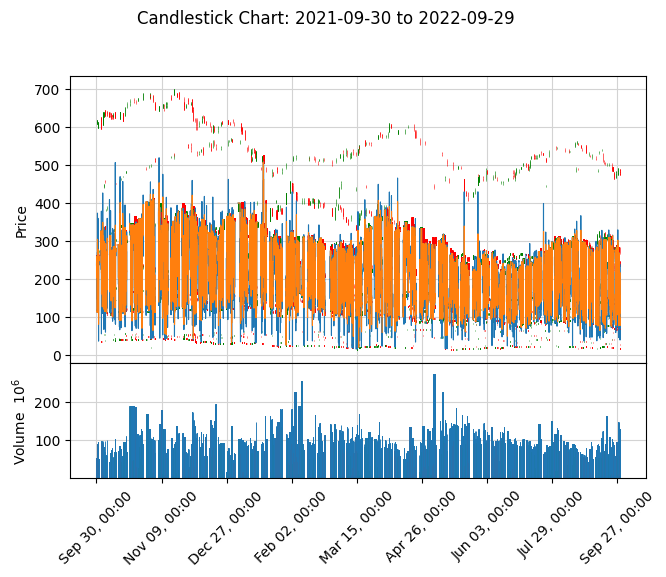

<Figure size 640x480 with 0 Axes>

Plot successfully saved at saved_plots/Candlestick_Chart_with_Volume_20250225_154358.png


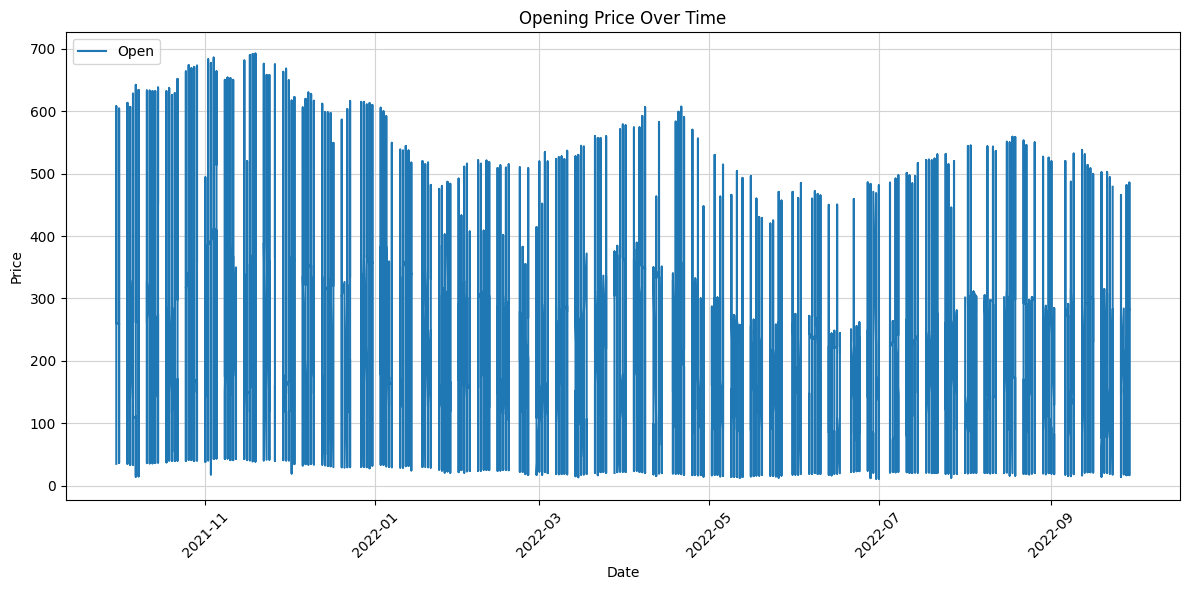

Plot successfully saved at saved_plots/Open_Price_Over_Time_20250225_154358.png


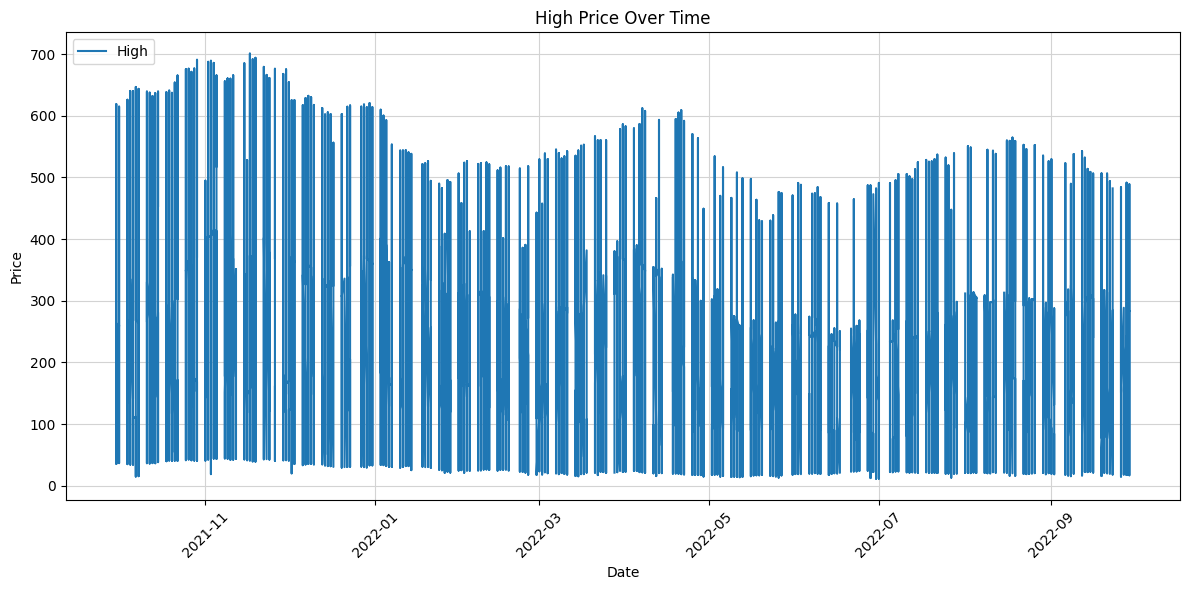

Plot successfully saved at saved_plots/High_Price_Over_Time_20250225_154359.png


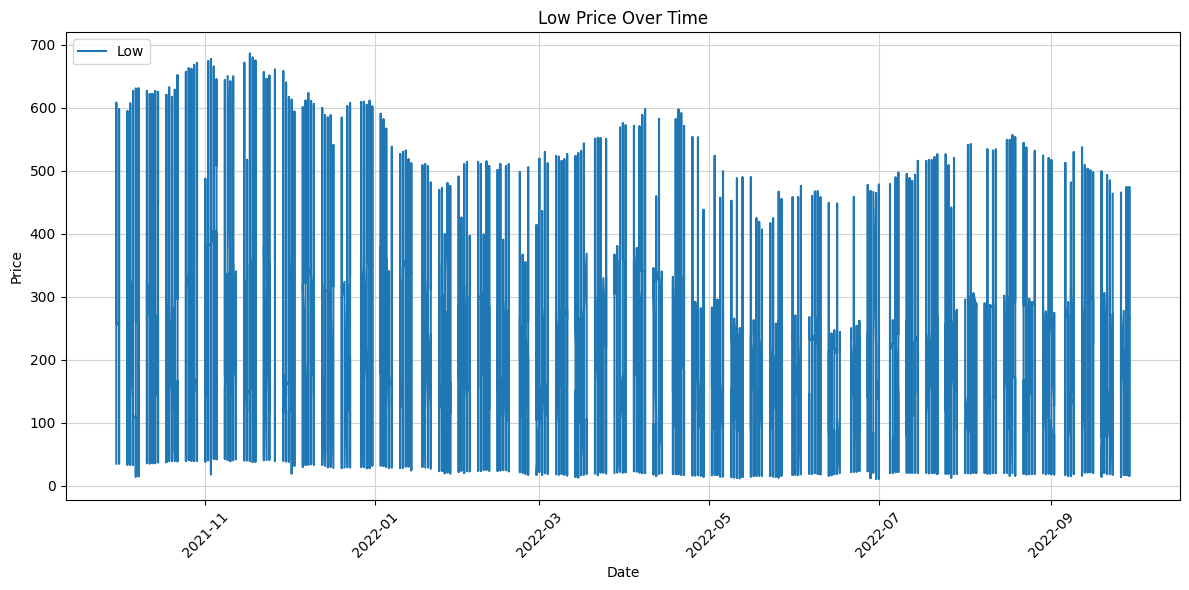

Plot successfully saved at saved_plots/Low_Price_Over_Time_20250225_154400.png


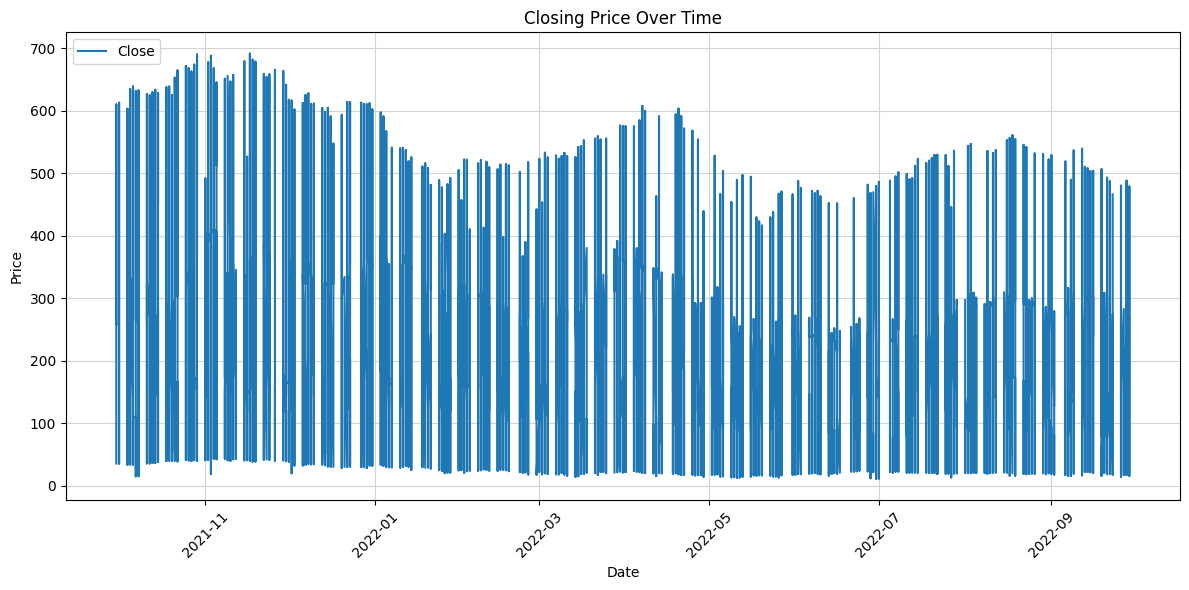

Plot successfully saved at saved_plots/Close_Price_Over_Time_20250225_154401.png


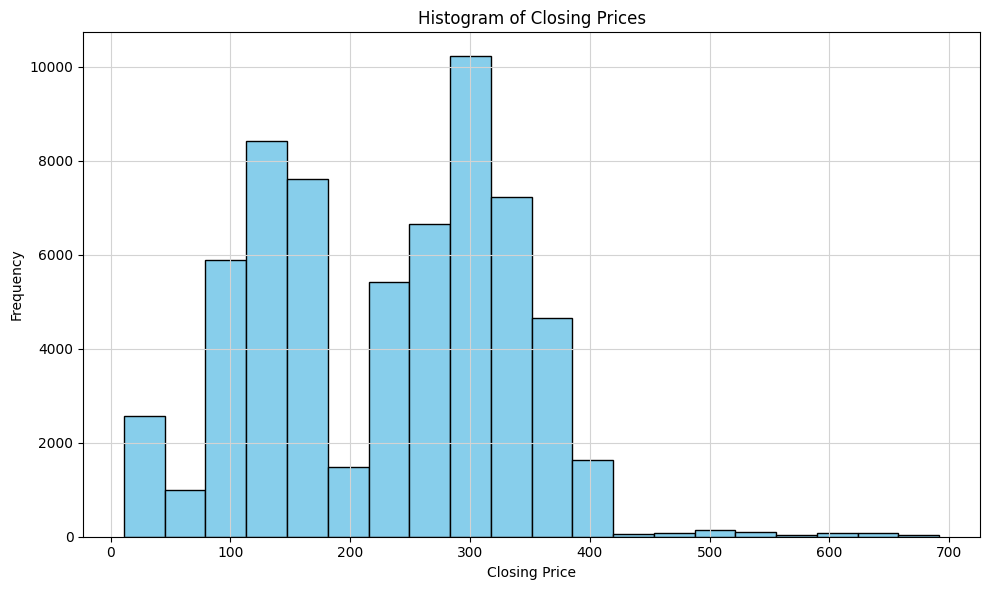

Plot successfully saved at saved_plots/Histogram_of_Closing_Prices_20250225_154402.png


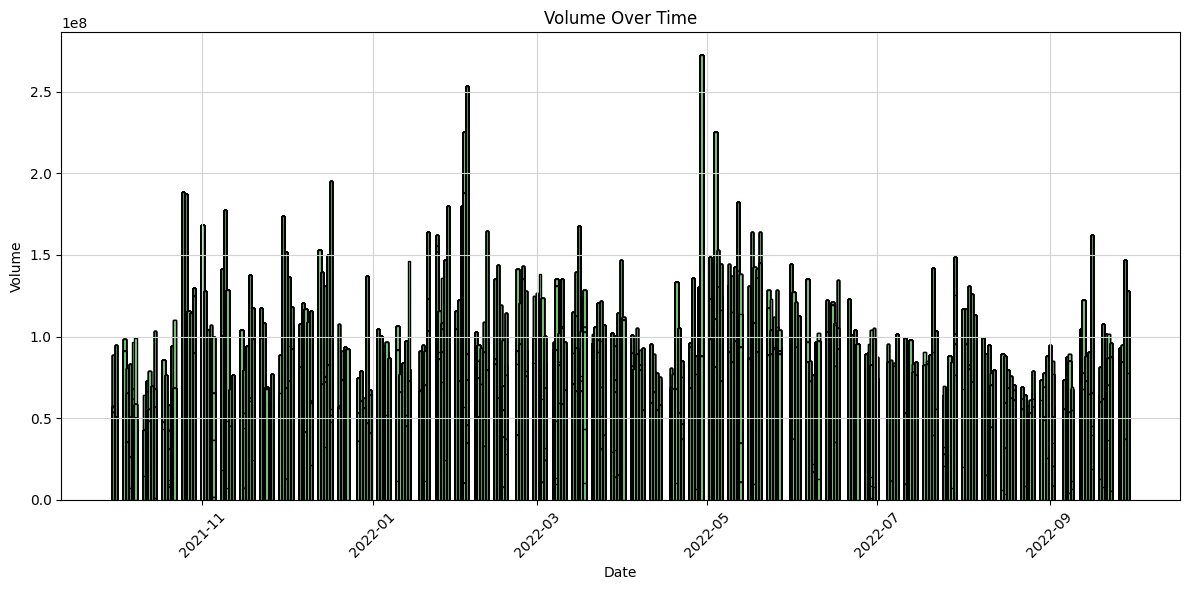

Plot successfully saved at saved_plots/Volume_Over_Time_20250225_154507.png


In [127]:
def plot_stock_visualizations(df_1):
    """
    Generates various stock visualizations from the provided DataFrame.

    Visualizations include:
      1. Candlestick chart with volume and moving averages.
      2. Time series line plot for open, high, low, and close prices.df_1_financial
      3. Histogram of closing prices.
      4. Bar plot for volume over time.

    Parameters:
        df_1 (pd.DataFrame): DataFrame containing stock data with columns:
                             'date', 'open', 'high', 'low', 'close', 'volume'.
    """

    # Ensure 'date' is in datetime format and sort the DataFrame by date
    df_1['date'] = pd.to_datetime(df_1['date'])
    df_sorted = df_1.sort_values('date')

    # 1. Candlestick Chart with Volume
    df_candle = df_sorted.set_index('date')

    # Define custom market colors and style for better readability
    market_colors = mpf.make_marketcolors(up='green', down='red', edge='inherit', wick='inherit', volume='in')
    style = mpf.make_mpf_style(marketcolors=market_colors, gridstyle='-', gridcolor='lightgray')

    # Title for the candlestick chart
    title = f'Candlestick Chart: {df_candle.index.min().date()} to {df_candle.index.max().date()}'

    # Plot the candlestick chart with volume and moving averages
    mpf.plot(df_candle, type='candle', style=style, title=title, volume=True, mav=(10, 20))
    save_and_show_plot("Candlestick_Chart_with_Volume")

    # 2. Time Series Plot of Stock Prices
    price_columns = ['open', 'high', 'low', 'close']
    plot_titles = ['Opening Price Over Time', 'High Price Over Time', 'Low Price Over Time', 'Closing Price Over Time']

    # Generate a separate plot for each price type
    for column, plot_title in zip(price_columns, plot_titles):
        plt.figure(figsize=(12, 6))
        plt.plot(df_sorted['date'], df_sorted[column], label=column.capitalize(), linewidth=1.5)
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.title(plot_title)
        plt.legend(loc='upper left')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        save_and_show_plot(f"{column.capitalize()}_Price_Over_Time")

    # 3. Histogram of Closing Prices
    plt.figure(figsize=(10, 6))
    plt.hist(df_sorted['close'], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel('Closing Price')
    plt.ylabel('Frequency')
    plt.title('Histogram of Closing Prices')
    plt.tight_layout()
    save_and_show_plot("Histogram_of_Closing_Prices")

    # 4. Volume Time Series Plot
    plt.figure(figsize=(12, 6))
    plt.bar(df_sorted['date'], df_sorted['volume'], color='lightgreen', edgecolor='black')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.title('Volume Over Time')
    plt.xticks(rotation=45)
    plt.tight_layout()
    save_and_show_plot("Volume_Over_Time")


# Generate and Save Stock Visualizations
plot_stock_visualizations(df_1)


In [128]:
df_1_financial.head()

,date,tweet,ticker,company_name,open,high,low,close,adj_close,volume,...,volume_moving_average_5,previous_day_close,previous_day_return,lagged_volatility_3,word_count,tokens,filtered_tokens,lemmatized_tokens,financial_keyword_count,ticker_mention_count
0,2022-09-29,mainstream media done amazing job brainwashing...,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,268.209991,77620600.0,...,NaN,NaN,NaN,NaN,27,"[mainstream, media, done, amazing, job, brainw...","[mainstream, media, done, amazing, job, brainw...","[mainstream, medium, done, amazing, job, brain...",0,37266
1,2022-09-29,tesla delivery estimates around analysts tsla,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,268.209991,77620600.0,...,NaN,268.209991,0.0,NaN,6,"[tesla, delivery, estimates, around, analysts,...","[tesla, delivery, estimates, around, analysts,...","[tesla, delivery, estimate, around, analyst, t...",0,37266
2,2022-09-29,even include unvested rsus additional equity n...,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,268.209991,77620600.0,...,NaN,268.209991,0.0,NaN,22,"[even, include, unvested, rsus, additional, eq...","[even, include, unvested, rsus, additional, eq...","[even, include, unvested, rsus, additional, eq...",3,37266
3,2022-09-29,hahaha still trying stop tesla fsd bro get shi...,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,268.209991,77620600.0,...,NaN,268.209991,0.0,6.723604,23,"[hahaha, still, trying, stop, tesla, fsd, bro,...","[hahaha, still, trying, stop, tesla, fsd, bro,...","[hahaha, still, trying, stop, tesla, fsd, bro,...",0,37266
4,2022-09-29,stop trying kill kids sad deranged old man,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,268.209991,77620600.0,...,77620600.0,268.209991,0.0,6.723604,8,"[stop, trying, kill, kids, sad, deranged, old,...","[stop, trying, kill, kids, sad, deranged, old,...","[stop, trying, kill, kid, sad, deranged, old, ...",0,37266


In [129]:


# Optional: Force TensorFlow usage (requires TensorFlow installed)
# os.environ["TRANSFORMERS_NO_TORCH"] = "1"

# -----------------------------------------------------------------------------
# Initialize the FinBERT sentiment analysis pipeline.
# Note: "yiyanghkust/finbert-tone" is the model identifier for FinBERT.
# Depending on your environment, it may default to PyTorch.
# -----------------------------------------------------------------------------
sentiment_pipeline = pipeline("sentiment-analysis", model="yiyanghkust/finbert-tone")

def get_sentiment(text):
    """
    Get the sentiment label and score for the input text using FinBERT.

    Parameters:
        text (str): The input text (e.g., a tweet) to analyze.

    Returns:
        tuple: A tuple containing (sentiment_label, sentiment_score).
    """
    result = sentiment_pipeline(text)
    sentiment_label = result[0]['label']
    sentiment_score = result[0]['score']
    return sentiment_label, sentiment_score

def apply_bert_sentiment(df, text_column="tweet"):
    """
    Applies FinBERT sentiment analysis to the text in the specified column of a DataFrame.

    This function performs the following:
      1. Enables a progress bar using tqdm.
      2. Applies the FinBERT sentiment analysis pipeline to each text entry.
      3. Extracts the sentiment label and sentiment score.
      4. Stores the results in two new columns: 'sentiment_label' and 'sentiment_score'.

    Parameters:
        df (pd.DataFrame): DataFrame containing a column with text data.
        text_column (str): The name of the column containing text. Default is 'tweet'.

    Returns:
        pd.DataFrame: The updated DataFrame with added 'sentiment_label' and 'sentiment_score' columns.
    """
    # Enable tqdm progress bar for the pandas apply method.
    tqdm.pandas()

    # Apply the get_sentiment function to each text entry,
    # expanding the returned tuple into two separate columns.
    df[['sentiment_label', 'sentiment_score']] = df[text_column].progress_apply(lambda text: pd.Series(get_sentiment(text)))

    print("BERT sentiment analysis completed.")
    return df

# -----------------------------------------------------------------------------

# Ensure that 'df_1_financial' is a DataFrame that contains at least the columns 'tweet' and 'ticker'.
# -----------------------------------------------------------------------------
df_1_financial = apply_bert_sentiment(df_1_financial)

# Display the first few rows to verify that the sentiment analysis results have been added.
print(df_1_financial[['ticker', 'tweet', 'sentiment_label', 'sentiment_score']].head())


Device set to use cuda:0
100%|██████████| 80467/80467 [11:51<00:00, 113.03it/s]

BERT sentiment analysis completed.
  ticker                                              tweet sentiment_label  \
0   TSLA  mainstream media done amazing job brainwashing...        Positive   
1   TSLA      tesla delivery estimates around analysts tsla         Neutral   
2   TSLA  even include unvested rsus additional equity n...         Neutral   
3   TSLA  hahaha still trying stop tesla fsd bro get shi...         Neutral   
4   TSLA         stop trying kill kids sad deranged old man         Neutral   

   sentiment_score  
0         0.999805  
1         0.999981  
2         0.999972  
3         0.987516  
4         0.742179  


In [130]:
df_1_financial

,date,tweet,ticker,company_name,open,high,low,close,adj_close,volume,...,previous_day_return,lagged_volatility_3,word_count,tokens,filtered_tokens,lemmatized_tokens,financial_keyword_count,ticker_mention_count,sentiment_label,sentiment_score
0,2022-09-29,mainstream media done amazing job brainwashing...,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,268.209991,77620600.0,...,NaN,NaN,27,"[mainstream, media, done, amazing, job, brainw...","[mainstream, media, done, amazing, job, brainw...","[mainstream, medium, done, amazing, job, brain...",0,37266,Positive,0.999805
1,2022-09-29,tesla delivery estimates around analysts tsla,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,268.209991,77620600.0,...,0.000000,NaN,6,"[tesla, delivery, estimates, around, analysts,...","[tesla, delivery, estimates, around, analysts,...","[tesla, delivery, estimate, around, analyst, t...",0,37266,Neutral,0.999981
2,2022-09-29,even include unvested rsus additional equity n...,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,268.209991,77620600.0,...,0.000000,NaN,22,"[even, include, unvested, rsus, additional, eq...","[even, include, unvested, rsus, additional, eq...","[even, include, unvested, rsus, additional, eq...",3,37266,Neutral,0.999972
3,2022-09-29,hahaha still trying stop tesla fsd bro get shi...,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,268.209991,77620600.0,...,0.000000,6.723604,23,"[hahaha, still, trying, stop, tesla, fsd, bro,...","[hahaha, still, trying, stop, tesla, fsd, bro,...","[hahaha, still, trying, stop, tesla, fsd, bro,...",0,37266,Neutral,0.987516
4,2022-09-29,stop trying kill kids sad deranged old man,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,268.209991,77620600.0,...,0.000000,6.723604,8,"[stop, trying, kill, kids, sad, deranged, old,...","[stop, trying, kill, kids, sad, deranged, old,...","[stop, trying, kill, kid, sad, deranged, old, ...",0,37266,Neutral,0.742179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80764,2021-10-07,fastest growing tech stocks market mix upst xp...,XPEV,XPeng Inc.,36.900002,38.880001,36.840000,38.259998,38.259998,12748700.0,...,NaN,3.198921,9,"[fastest, growing, tech, stocks, market, mix, ...","[fastest, growing, tech, stocks, market, mix, ...","[fastest, growing, tech, stock, market, mix, u...",2,225,Neutral,0.705793
80765,2021-10-04,earnings horizon quick snapshot largest increa...,XPEV,XPeng Inc.,35.180000,35.200001,33.520000,34.110001,34.110001,6557200.0,...,10.846832,2.891571,23,"[earnings, horizon, quick, snapshot, largest, ...","[earnings, horizon, quick, snapshot, largest, ...","[earnings, horizon, quick, snapshot, largest, ...",3,225,Neutral,0.609020
80766,2021-10-01,record delivery results testimony unwavering p...,XPEV,XPeng Inc.,36.750000,36.759998,35.080002,35.459999,35.459999,7770600.0,...,-3.957779,NaN,15,"[record, delivery, results, testimony, unwaver...","[record, delivery, results, testimony, unwaver...","[record, delivery, result, testimony, unwaveri...",0,225,Positive,1.000000
80767,2021-10-01,delivered smart evs sep reaching milestone uni...,XPEV,XPeng Inc.,36.750000,36.759998,35.080002,35.459999,35.459999,7770600.0,...,0.000000,5.537462,19,"[delivered, smart, evs, sep, reaching, milesto...","[delivered, smart, evs, sep, reaching, milesto...","[delivered, smart, ev, sep, reaching, mileston...",0,225,Positive,0.999983


In [131]:

# -----------------------------------------------------------------------------
# Encode the 'sentiment' column using LabelEncoder
# -----------------------------------------------------------------------------
# Initialize the LabelEncoder.
label_encoder = LabelEncoder()

# Check if the 'sentiment' column exists in the DataFrame.
if 'sentiment_label' in df_1_financial.columns:
    # Fit the label encoder on the 'sentiment' column and transform it,
    # creating a new column 'sentiment_encoded'.
    df_1_financial['sentiment_encoded'] = label_encoder.fit_transform(df_1_financial['sentiment_label'])

    # Preview the unique sentiment labels and their corresponding encoded values.
    print("Encoded sentiment values:")
    print(df_1_financial[['sentiment_label', 'sentiment_encoded']].drop_duplicates())
else:
    print("Column 'sentiment' not found in the DataFrame.")

# -----------------------------------------------------------------------------
# Flatten the tokenized tweets into a single space-separated string
# -----------------------------------------------------------------------------
def flatten_tokens(tokens):
    """
    Converts a list of tokens into a single space-separated string.

    Parameters:
        tokens (list): A list of tokenized words.

    Returns:
        str: A single string containing all tokens separated by a space.
             Returns an empty string if the input is not a list.
    """
    if isinstance(tokens, list):
        return ' '.join(tokens)
    return ''

# Check if the 'lemmatized_tokens' column exists before applying the flattening function.
if 'lemmatized_tokens' in df_1_financial.columns:
    # Apply the flatten_tokens function to the 'lemmatized_tokens' column
    # to create a new column 'flattened_tweet'.
    df_1_financial['flattened_tweet'] = df_1_financial['lemmatized_tokens'].apply(flatten_tokens)

    # Display the first few rows of the ticker and flattened tweet columns.
    print("Flattened tweets preview:")
    print(df_1_financial[['ticker', 'flattened_tweet']].head())
else:
    print("Column 'lemmatized_tokens' not found in the DataFrame.")


Encoded sentiment values:
  sentiment_label  sentiment_encoded
0        Positive                  2
1         Neutral                  1
9        Negative                  0
Flattened tweets preview:
  ticker                                    flattened_tweet
0   TSLA  mainstream medium done amazing job brainwashin...
1   TSLA        tesla delivery estimate around analyst tsla
2   TSLA  even include unvested rsus additional equity n...
3   TSLA  hahaha still trying stop tesla fsd bro get shi...
4   TSLA          stop trying kill kid sad deranged old man


'sentiment_encoded' column already exists.

Training and evaluating Random Forest...

Results for Random Forest:
Accuracy: 0.9158099710775751
Classification Report:
               precision    recall  f1-score   support

    Negative       0.94      0.97      0.95     11502
     Neutral       0.90      0.87      0.88     11658
    Positive       0.91      0.91      0.91     11761

    accuracy                           0.92     34921
   macro avg       0.92      0.92      0.92     34921
weighted avg       0.92      0.92      0.92     34921



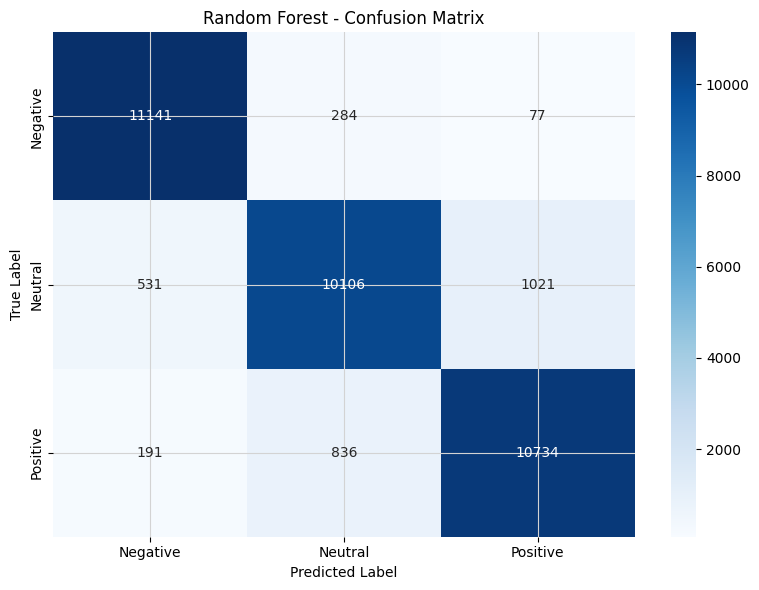

Plot successfully saved at saved_plots/Random_Forest_-_Confusion_Matrix_20250225_160215.png

Training and evaluating XGBoost...

Results for XGBoost:
Accuracy: 0.7866040491394862
Classification Report:
               precision    recall  f1-score   support

    Negative       0.78      0.86      0.81     11502
     Neutral       0.77      0.74      0.76     11658
    Positive       0.81      0.76      0.79     11761

    accuracy                           0.79     34921
   macro avg       0.79      0.79      0.79     34921
weighted avg       0.79      0.79      0.79     34921



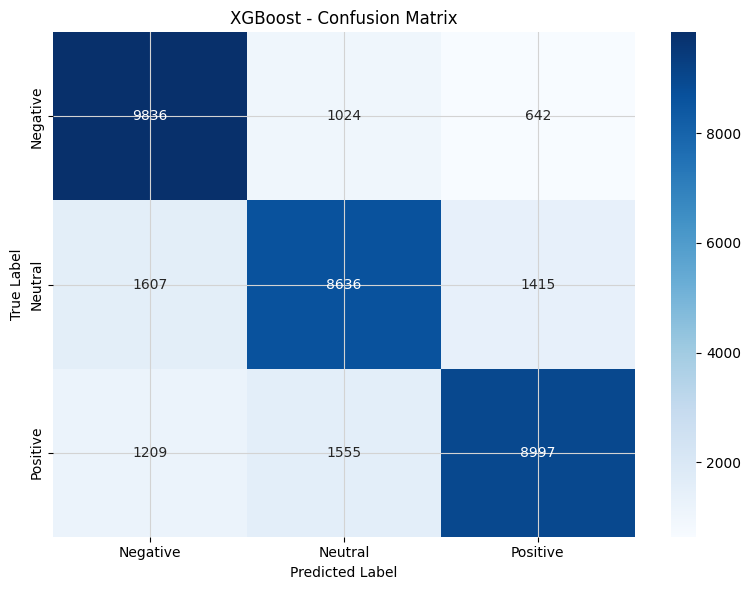

Plot successfully saved at saved_plots/XGBoost_-_Confusion_Matrix_20250225_160221.png

Training and evaluating Logistic Regression...

Results for Logistic Regression:
Accuracy: 0.5505283353855847
Classification Report:
               precision    recall  f1-score   support

    Negative       0.52      0.57      0.54     11502
     Neutral       0.53      0.59      0.55     11658
    Positive       0.63      0.49      0.56     11761

    accuracy                           0.55     34921
   macro avg       0.56      0.55      0.55     34921
weighted avg       0.56      0.55      0.55     34921



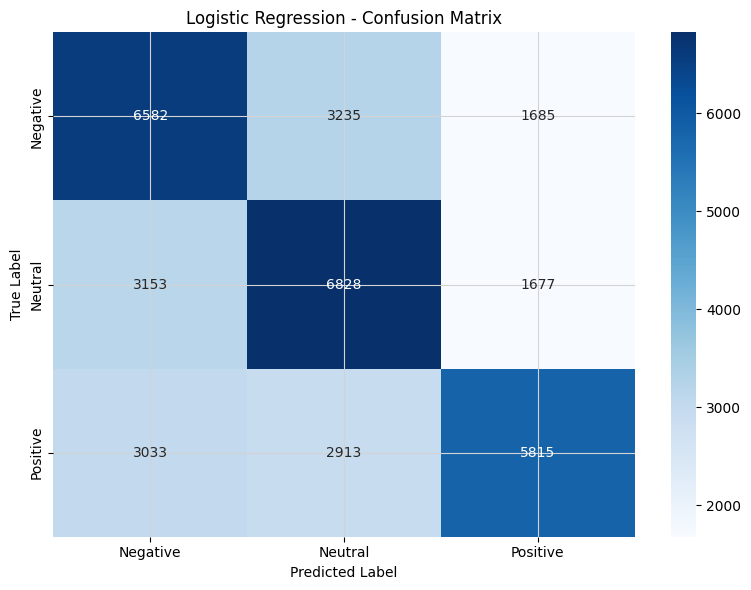

Plot successfully saved at saved_plots/Logistic_Regression_-_Confusion_Matrix_20250225_160223.png


In [132]:
# -----------------------------------------------------------------------------
# Step A: Encode the Sentiment Labels
# -----------------------------------------------------------------------------
# Encode sentiment labels if not already encoded
if 'sentiment_encoded' not in df_1_financial.columns:
    label_encoder = LabelEncoder()
    df_1_financial['sentiment_encoded'] = label_encoder.fit_transform(df_1_financial['sentiment_label'])
    print("Created 'sentiment_encoded' column.")
else:
    print("'sentiment_encoded' column already exists.")

# Define category names from the label encoder
try:
    category_names = list(label_encoder.classes_)
except NameError:
    category_names = sorted(df_1_financial['sentiment_label'].unique().tolist())

# -----------------------------------------------------------------------------
# Step B: Prepare Text Features Using CountVectorizer, PCA, and SMOTE
# -----------------------------------------------------------------------------
def prepare_features_with_smote(df, text_column='flattened_tweet', target_column='sentiment_encoded',
                                max_features=1000, n_components=100, test_size=0.2, random_state=42):
    """
    Prepares text features for classification using CountVectorizer, PCA, and SMOTE.
    """
    vectorizer = CountVectorizer(max_features=max_features)
    X_bow = vectorizer.fit_transform(df[text_column]).toarray()

    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_bow)

    smote = SMOTE(random_state=random_state)
    X_resampled, y_resampled = smote.fit_resample(X_pca, df[target_column])

    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

# Prepare the features
X_train, X_test, y_train, y_test = prepare_features_with_smote(df_1_financial)

# -----------------------------------------------------------------------------
# Step C: Model Building and Evaluation
# -----------------------------------------------------------------------------
# Define classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    #"Support Vector Machine": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Function to plot a confusion matrix as a heatmap and save the plot
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    save_and_show_plot(f"{title.replace(' ', '_')}")

# Train and evaluate each classifier
for name, clf in classifiers.items():
    print(f"\nTraining and evaluating {name}...\n")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred, target_names=category_names)

    print(f"Results for {name}:")
    print("Accuracy:", acc)
    print("Classification Report:\n", cr)

    # Plot and save the confusion matrix
    plot_confusion_matrix(cm, classes=category_names, title=f"{name} - Confusion Matrix")

    # ROC Curve for binary classification
    if len(category_names) == 2:
        y_prob = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{name} - ROC Curve')
        plt.legend(loc="lower right")
        plt.tight_layout()
        save_and_show_plot(f"{name}_ROC_Curve")

In [133]:
df_p= df_1_financial.copy()

In [134]:
print("\n\nAttributes Names in Train Dataset:")
print("==================================\n")

print(df_p.columns)

print("\n\nNumber of instances in Train Dataset:")
print("====================================\n")

total_dataset_instances= len(df_p.index)
print("Total Train Data instances:",total_dataset_instances)



Attributes Names in Train Dataset:

Index(['date', 'tweet', 'ticker', 'company_name', 'open', 'high', 'low',
       'close', 'adj_close', 'volume', 'daily_return', 'price_change',
       'volatility', 'price_range', 'moving_average_5', 'moving_average_10',
       'exponential_moving_average_10', 'volume_change',
       'volume_moving_average_5', 'previous_day_close', 'previous_day_return',
       'lagged_volatility_3', 'word_count', 'tokens', 'filtered_tokens',
       'lemmatized_tokens', 'financial_keyword_count', 'ticker_mention_count',
       'sentiment_label', 'sentiment_score', 'sentiment_encoded',
       'flattened_tweet'],
      dtype='object')


Number of instances in Train Dataset:

Total Train Data instances: 80467


In [135]:
print('The Count of sentiments in the dataset : \n')
Sentiment =df_p.sentiment_label.value_counts()
Sentiment.to_frame().T


The Count of sentiments in the dataset : 



sentiment_label,Neutral,Positive,Negative
count,58201,16210,6056


In [136]:
print(f'The unique values of Sentiments : {len(df_p.sentiment_label.unique())}')
print('**' * 20)
print(df_p.sentiment_label.unique())

The unique values of Sentiments : 3
****************************************
['Positive' 'Neutral' 'Negative']



Number of instances and Classes in Training Dataset:



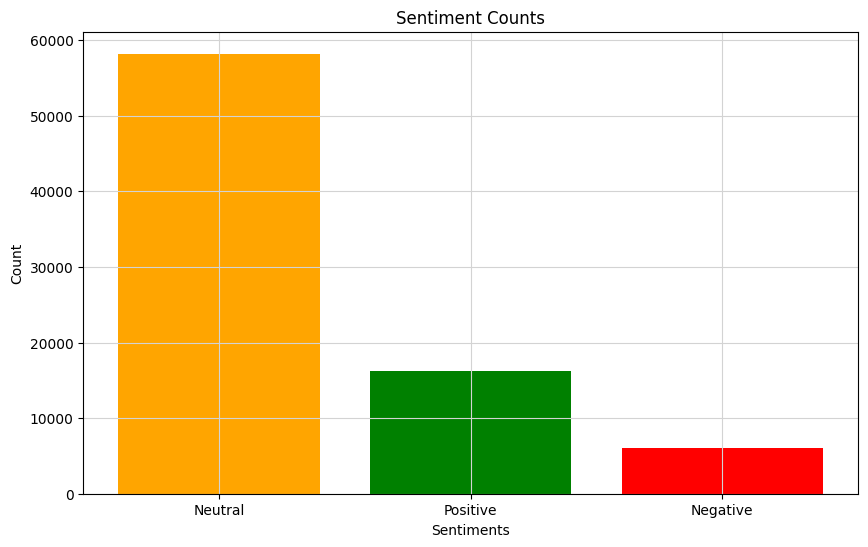

In [137]:
import matplotlib.pyplot as plt

print("\nNumber of instances and Classes in Training Dataset:")
print("======================================================\n")

# Assuming sentiment_counts is a Pandas Series containing sentiment counts
sentiment_counts = df_p['sentiment_label'].value_counts()

# Set the figure size
plt.figure(figsize=(10, 6))

# Define a color for each sentiment
colors = {'Positive': 'green', 'Neutral': 'orange', 'Negative': 'red'}

# Create a bar graph with colored bars
plt.bar(sentiment_counts.index, sentiment_counts.values, color=[colors[sent] for sent in sentiment_counts.index])

# Add labels and a title
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.title('Sentiment Counts')

# Show the bar graph
plt.show()


In [138]:
import plotly.graph_objects as go

sentiment_counts = df_p['sentiment_label'].value_counts().sort_index()

sentiment_labels = ['Negative', 'Neutral', 'Positive']
sentiment_colors = ['red', 'grey', 'green']


fig = go.Figure(data=[go.Pie(labels=sentiment_counts.index,
                             values=sentiment_counts.values,
                             textinfo='percent+value+label',
                             marker_colors=sentiment_colors,
                             textposition='auto',
                             hole=.3)])

fig.update_layout(
    title_text='Sentiment Distribution',
    template='plotly_white',
    xaxis=dict(
        title='Sources',
        title_standoff=15,  # Adjust the distance of the title from the axis
    ),
    yaxis=dict(
        title='Number of Posts in Twitter',
        title_standoff=15,  # Adjust the distance of the title from the axis
    ),
    title_x=0.5,  # Center the title
    title_y=0.95,  # Adjust the vertical position of the title
)

fig.update_traces(marker_line_color='black',
                  marker_line_width=1.5,
                  opacity=0.8)

fig.show()


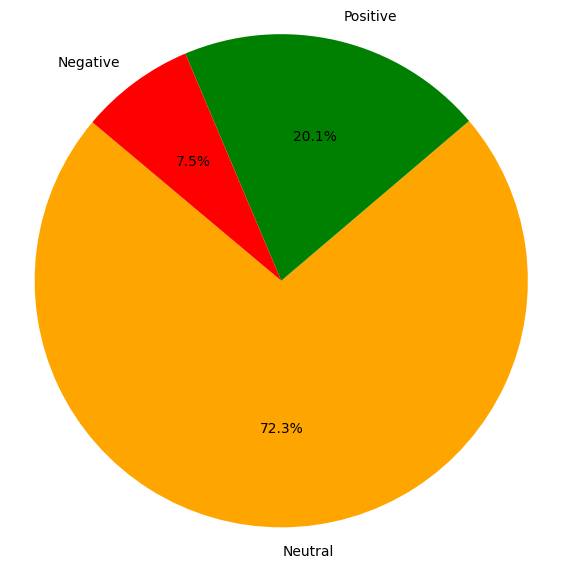

In [139]:
sentiment_counts = df_p['sentiment_label'].value_counts()

# Define colors for each sentiment
colors = {'Negative': 'red', 'Positive': 'green', 'Neutral': 'orange'}

# Create a pie chart with custom colors
plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=[colors[s] for s in sentiment_counts.index])
# plt.title("Sentiment Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

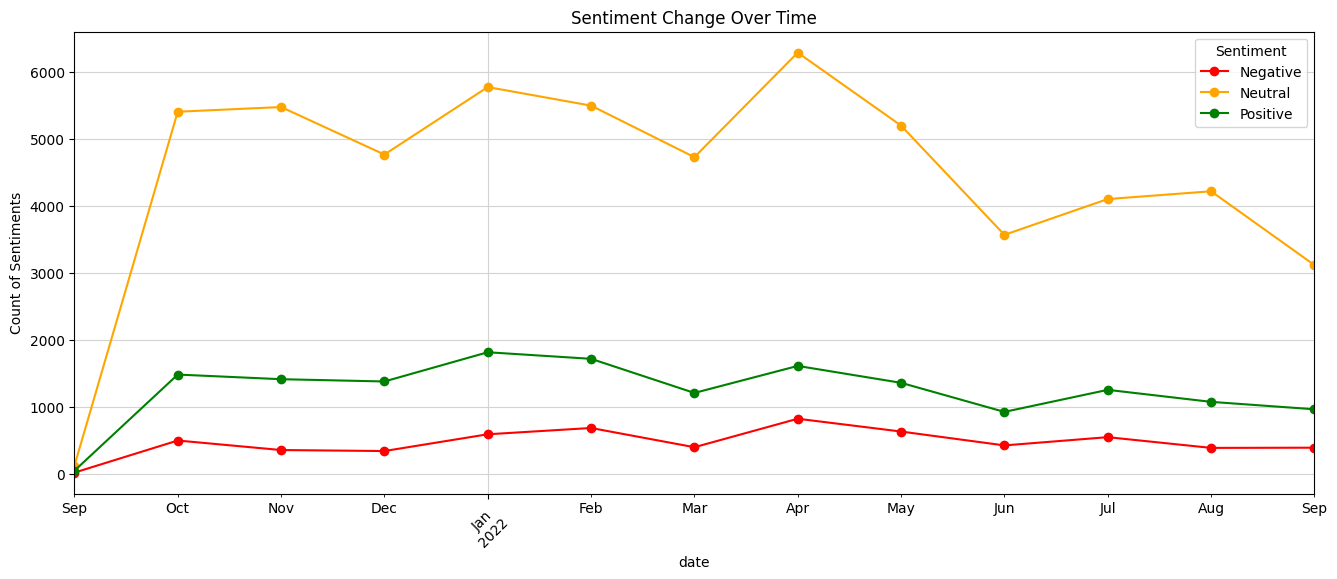

In [140]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have defined the colors dictionary
colors = {'Negative': 'red', 'Positive': 'green', 'Neutral': 'orange'}

df_p['date'] = pd.to_datetime(df_p['date'])  # Convert 'published' to datetime

# Grouping sentiments by month and counting their occurrences
sentiments_over_time = df_p.groupby([df_p['date'].dt.to_period('M'), 'sentiment_label']).size().unstack().fillna(0)

# Plotting sentiments over time with adjusted figure size directly in plot function
ax = sentiments_over_time.plot(kind='line', marker='o', figsize=(16, 6))

plt.xlabel('date')
plt.ylabel('Count of Sentiments')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Sentiment Change Over Time')

# Set color for each sentiment label
for sentiment, color in colors.items():
    ax.lines[sentiments_over_time.columns.get_loc(sentiment)].set_color(color)

plt.legend(title='Sentiment')
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


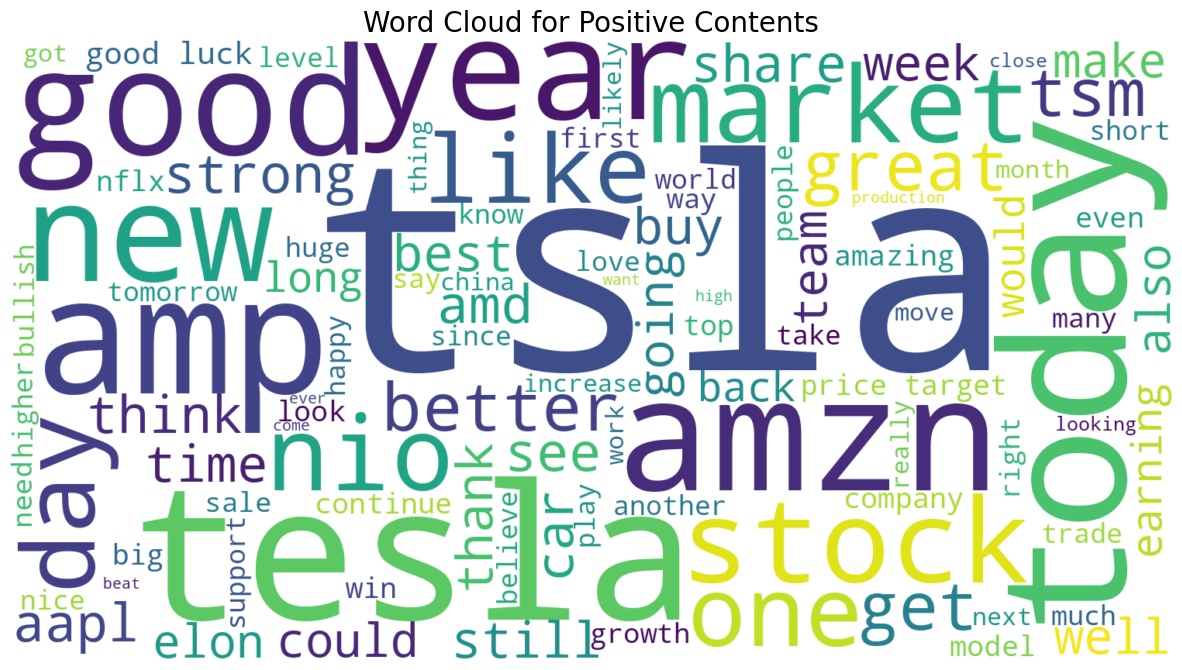

In [141]:
# Download stopwords if not already available
nltk.download('stopwords')

# Create a list of stopwords
stop_words = set(stopwords.words('english'))

# Filter positive reviews from the dataset
positive_reviews = df_p[df_p['sentiment_label'] == 'Positive']['tweet']

# Combine all positive tweets into a single string
positive_text = " ".join(map(str, positive_reviews))

# Generate the word cloud for positive sentiments
positive_wordcloud = WordCloud(
    stopwords=stop_words,
    background_color="white",
    max_words=100,
    width=1500,
    height=800,
    min_font_size=15
).generate(positive_text)

# Display the generated word cloud image
plt.figure(figsize=(15, 15))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Contents', fontsize=20)
plt.axis("off")
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


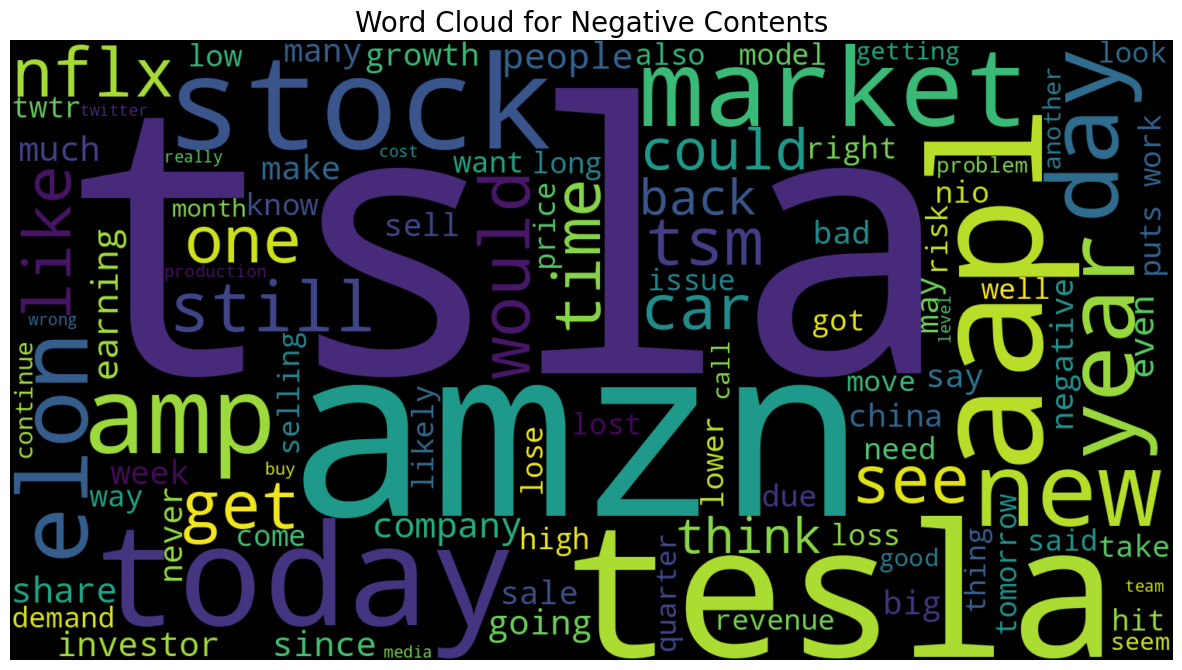

In [142]:
import nltk
nltk.download('stopwords')
stopwords_list = set(stopwords.words('english'))

# Filter negative reviews from the dataset
negative_reviews = df_p[df_p['sentiment_label'] == 'Negative']['tweet']

# Combine all negative tweets into a single string
neg_text = ' '.join(map(str, negative_reviews))

# Generate the word cloud for negative sentiments
neg_wordcloud = WordCloud(
    max_words=100,
    width=1500,
    height=800,
    background_color='black',
    stopwords=stopwords_list,  # Correct parameter name
    min_font_size=15
).generate(neg_text)

# Plot the word cloud
plt.figure(figsize=(15, 15))
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Contents', fontsize=20)
plt.axis('off')
plt.show()

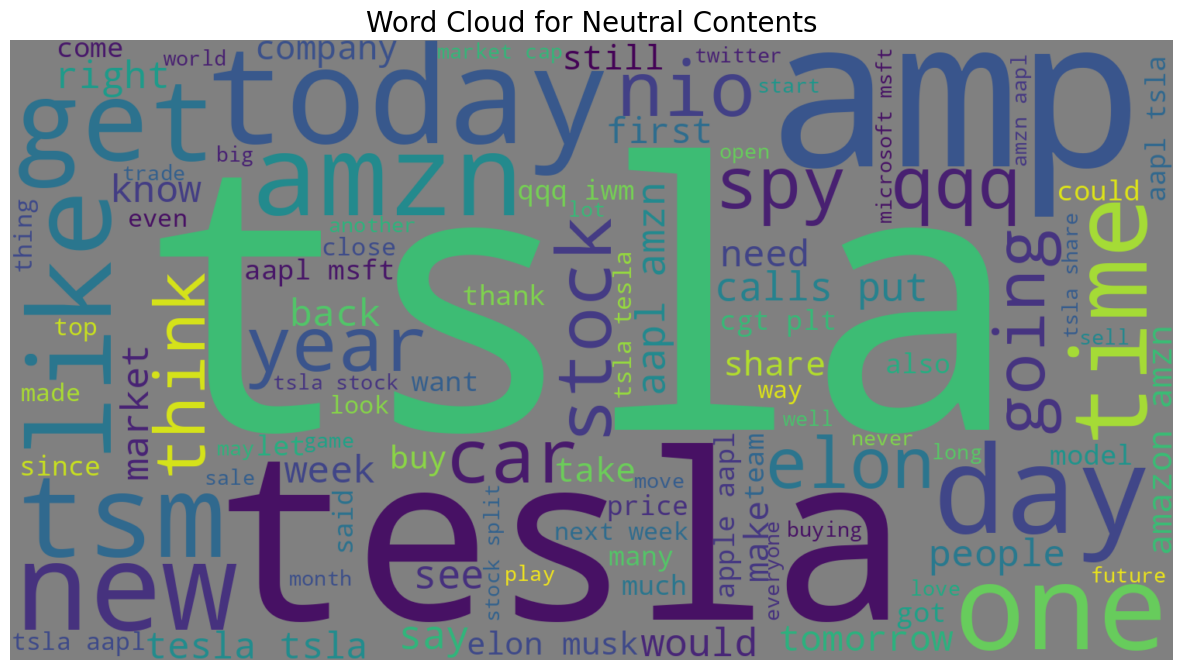

In [143]:
# Filter neutral reviews from the dataset
neutral_reviews = df_p[df_p['sentiment_label'] == 'Neutral']['tweet']

# Combine all neutral tweets into a single string
neutral_text = ' '.join(map(str, neutral_reviews))

# Generate the word cloud for neutral sentiments
neutral_wordcloud = WordCloud(
    max_words=100,
    width=1500,
    height=800,
    background_color='gray',  # Using a gray background to distinguish neutral
    stopwords=stopwords_list,  # Apply stopwords
    min_font_size=15
).generate(neutral_text)

# Plot the word cloud
plt.figure(figsize=(15, 15))
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Neutral Contents', fontsize=20)
plt.axis('off')
plt.show()

In [169]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load Data
#file_path = "outputfile.xlsx"  # Path to your dataset
df=df_1.copy()



In [170]:
df.head()

,date,tweet,ticker,company_name,open,high,low,close,adj_close,volume,...,word_count,tokens,filtered_tokens,lemmatized_tokens,financial_keyword_count,ticker_mention_count,sentiment_label,sentiment_score,sentiment_encoded,flattened_tweet
0,2022-09-29,mainstream media done amazing job brainwashing...,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,268.209991,77620600.0,...,27,"[mainstream, media, done, amazing, job, brainw...","[mainstream, media, done, amazing, job, brainw...","[mainstream, medium, done, amazing, job, brain...",0,37266,Positive,0.999805,2,mainstream medium done amazing job brainwashin...
1,2022-09-29,tesla delivery estimates around analysts tsla,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,268.209991,77620600.0,...,6,"[tesla, delivery, estimates, around, analysts,...","[tesla, delivery, estimates, around, analysts,...","[tesla, delivery, estimate, around, analyst, t...",0,37266,Neutral,0.999981,1,tesla delivery estimate around analyst tsla
2,2022-09-29,even include unvested rsus additional equity n...,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,268.209991,77620600.0,...,22,"[even, include, unvested, rsus, additional, eq...","[even, include, unvested, rsus, additional, eq...","[even, include, unvested, rsus, additional, eq...",3,37266,Neutral,0.999972,1,even include unvested rsus additional equity n...
3,2022-09-29,hahaha still trying stop tesla fsd bro get shi...,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,268.209991,77620600.0,...,23,"[hahaha, still, trying, stop, tesla, fsd, bro,...","[hahaha, still, trying, stop, tesla, fsd, bro,...","[hahaha, still, trying, stop, tesla, fsd, bro,...",0,37266,Neutral,0.987516,1,hahaha still trying stop tesla fsd bro get shi...
4,2022-09-29,stop trying kill kids sad deranged old man,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,268.209991,77620600.0,...,8,"[stop, trying, kill, kids, sad, deranged, old,...","[stop, trying, kill, kids, sad, deranged, old,...","[stop, trying, kill, kid, sad, deranged, old, ...",0,37266,Neutral,0.742179,1,stop trying kill kid sad deranged old man


LSTM model intregated with FinBERT

Epoch 1/30
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0087 - val_loss: 0.0012
Epoch 2/30
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 2.2560e-04 - val_loss: 0.0013
Epoch 3/30
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 1.7267e-04 - val_loss: 0.0014
Epoch 4/30
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 1.5247e-04 - val_loss: 0.0028
Epoch 5/30
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 1.3704e-04 - val_loss: 0.0037
Epoch 6/30
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 1.1760e-04 - val_loss: 0.0039
Epoch 7/30
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 1.0652e-04 - val_loss: 0.0047
Epoch 8/30
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 9.6210e-05 - val_loss: 0.0036
Epoch 9/30
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 9.0000e-05 - val_loss: 0.0056
Epoch 10/30
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 8.7292e-05 - val_loss: 0.0048
Epoch 11/30
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 7.3416e-05 - val_lo

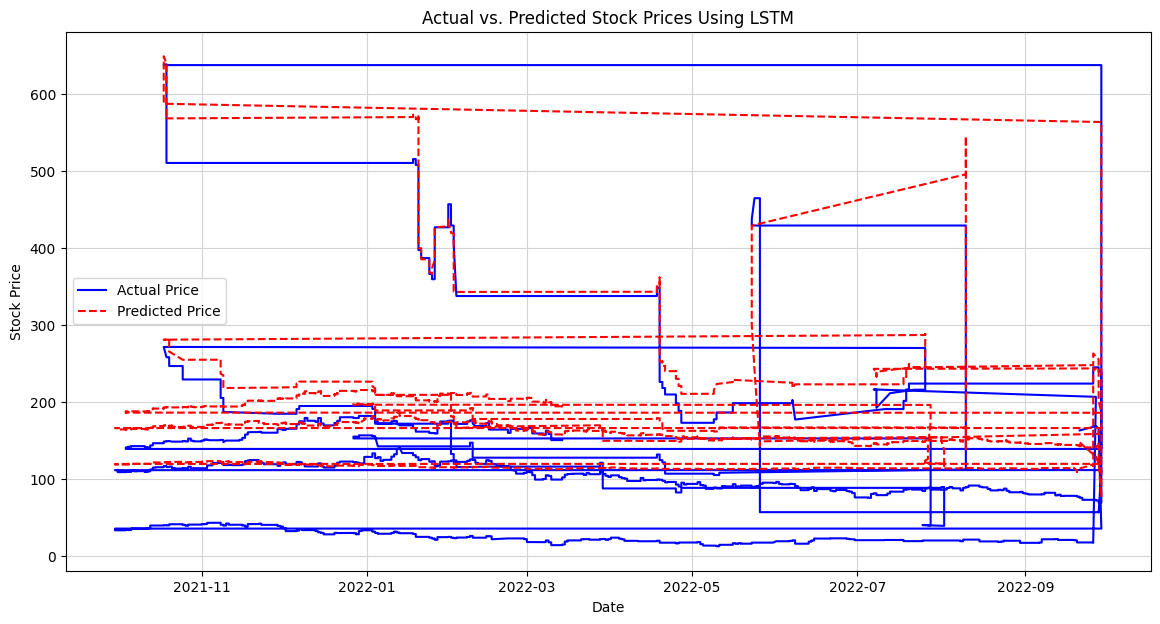

In [171]:
# Ensure the Date column is in datetime format
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

## Feature Engineering: Moving Averages
df['MA7'] = df['close'].rolling(window=7).mean()
df['MA20'] = df['close'].rolling(window=20).mean()

# Exponential Moving Average (EMA)
df['EMA'] = df['close'].ewm(span=20, adjust=False).mean()

# Bollinger Bands
std20 = df['close'].rolling(window=20).std()
df['Upper_BB'] = df['MA20'] + (std20 * 2)
df['Lower_BB'] = df['MA20'] - (std20 * 2)

# Drop NaN values (due to rolling calculations)
df.dropna(inplace=True)

# Normalize Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['close', 'MA7', 'MA20', 'EMA', 'Upper_BB', 'Lower_BB']])

# Prepare Data for LSTM
def create_sequences(data, time_step=10):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :])  # Features: Close, MA7, MA20, etc.
        Y.append(data[i + time_step, 0])  # Target: Closing price
    return np.array(X), np.array(Y)

time_step = 10
X, Y = create_sequences(scaled_data, time_step)

# Splitting Dataset into Train and Test Sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Build LSTM Model for Stock Price Prediction
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the Model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Model
history = model.fit(
    X_train, Y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, Y_test),
    verbose=1
)

# Make Predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(
    np.concatenate((predicted_prices, np.zeros((predicted_prices.shape[0], 5))), axis=1)
)[:, 0]

# Reverse Transform Y_test to Actual Prices
actual_prices = scaler.inverse_transform(
    np.concatenate((Y_test.reshape(-1, 1), np.zeros((Y_test.shape[0], 5))), axis=1)
)[:, 0]

# Calculate Performance Metrics
rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
mae = mean_absolute_error(actual_prices, predicted_prices)
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

# Plot Actual vs. Predicted Stock Prices
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(actual_prices):], actual_prices, label="Actual Price", color="blue")
plt.plot(df.index[-len(predicted_prices):], predicted_prices, label="Predicted Price", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Actual vs. Predicted Stock Prices Using LSTM")
plt.legend()
plt.show()
